In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1
Clustering:
Digital Ads Data:
The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.


1.1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc. ………………………


In [3]:
data_df = pd.read_excel("Clustering Clean Ads_Data.xlsx")

In [4]:
data_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
data_df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [8]:
data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [9]:
data_df.duplicated().sum()

0

In [13]:
data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Missing values has to be treated in CTR CPM & CPC column 

1.2 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.


CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 


In [15]:
def calculate_CPM(x):
    TotalCampaignSpend=data_df.Spend
    No_ofImpressions=data_df.Impressions
    CPM = (TotalCampaignSpend/No_ofImpressions)*1000
    return CPM

In [17]:
data_df['CPM']= data_df[['CPM']].apply(lambda x: calculate_CPM(x))

In [22]:
data_df.CPM.isnull().sum()

0

In [23]:
def calculate_CPC(x):
    TotalCampaignSpend=data_df.Spend
    No_ofClicks=data_df.Clicks
    CPC = (TotalCampaignSpend/No_ofClicks)
    return CPC

In [24]:
data_df['CPC']= data_df[['CPC']].apply(lambda x: calculate_CPC(x))

In [30]:
data_df.CPC.isnull().sum()

0

In [33]:
def calculate_CTR(x):
    No_ofClicks=data_df.Clicks
    No_ofImpressions=data_df.Impressions
    CTR = (No_ofClicks/No_ofImpressions)*100
    return CTR

In [34]:
data_df['CTR']= data_df[['CTR']].apply(lambda x: calculate_CTR(x))

In [35]:
data_df.CTR.isnull().sum()

0

1.3 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst). 

In [36]:
df_data = data_df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'], axis = 1)

In [37]:
df_data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


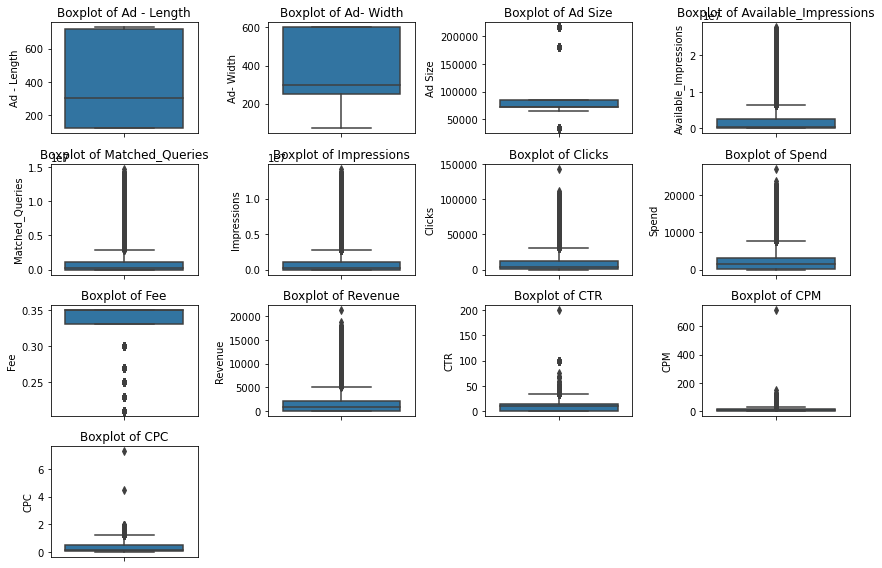

In [42]:
plt.figure(figsize = (12,8))
feature_list = df_data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_data[feature_list[i]], data = df_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

As there are many outliers in the data hence it's important to treat the outliers for K-Means clustering.
To treat outliers lets define a function 'remove_outlier' which returns the Upper and Lower limit to detect outliers for each feature.
    We have Capped & Floored the values beyond the outlier boundaries.


In [43]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
for i in feature_list:
    LL, UL = remove_outlier(df_data[i])
    df_data[i] = np.where(df_data[i] > UL, UL, df_data[i])
    df_data[i] = np.where(df_data[i] < LL, LL, df_data[i])

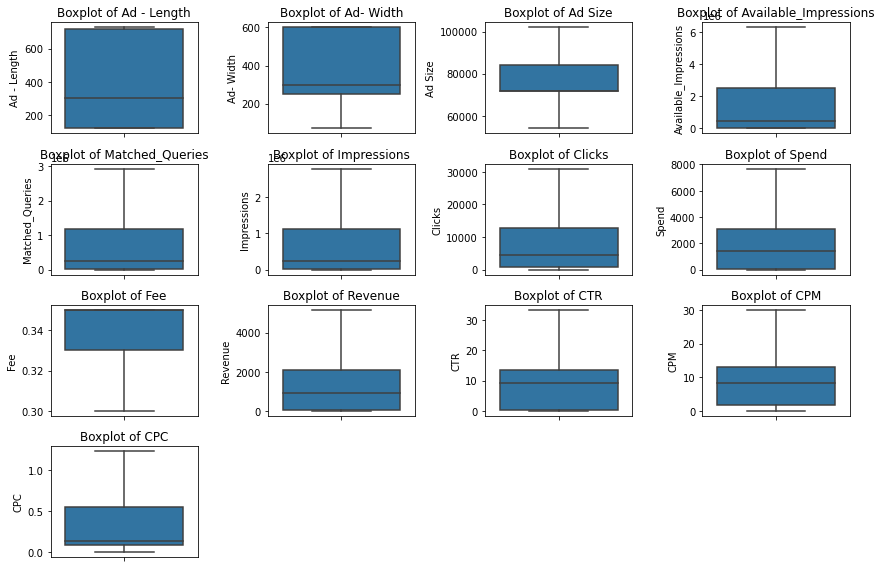

In [45]:
plt.figure(figsize = (12,8))
feature_list = df_data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_data[feature_list[i]], data = df_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

1.4 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.


Yes, scaling is required in this data set as all features have different weights and to ensure that none of the feature is identified as important only because of the weight, scaling is mandatory for this data set. Standardization before clustering
algorithm leads to obtain a better quality, efficient and accurate cluster result. Z-score is the most powerful method that will give more accurate and efficient result among the three methods in K-means clustering algorithm.

In [50]:
from scipy.stats import zscore
df_pca_scaled = df_data.apply(zscore)
df_pca_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


1.5 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [62]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

In [63]:
wardlink = linkage(df_pca_scaled, method = 'ward')

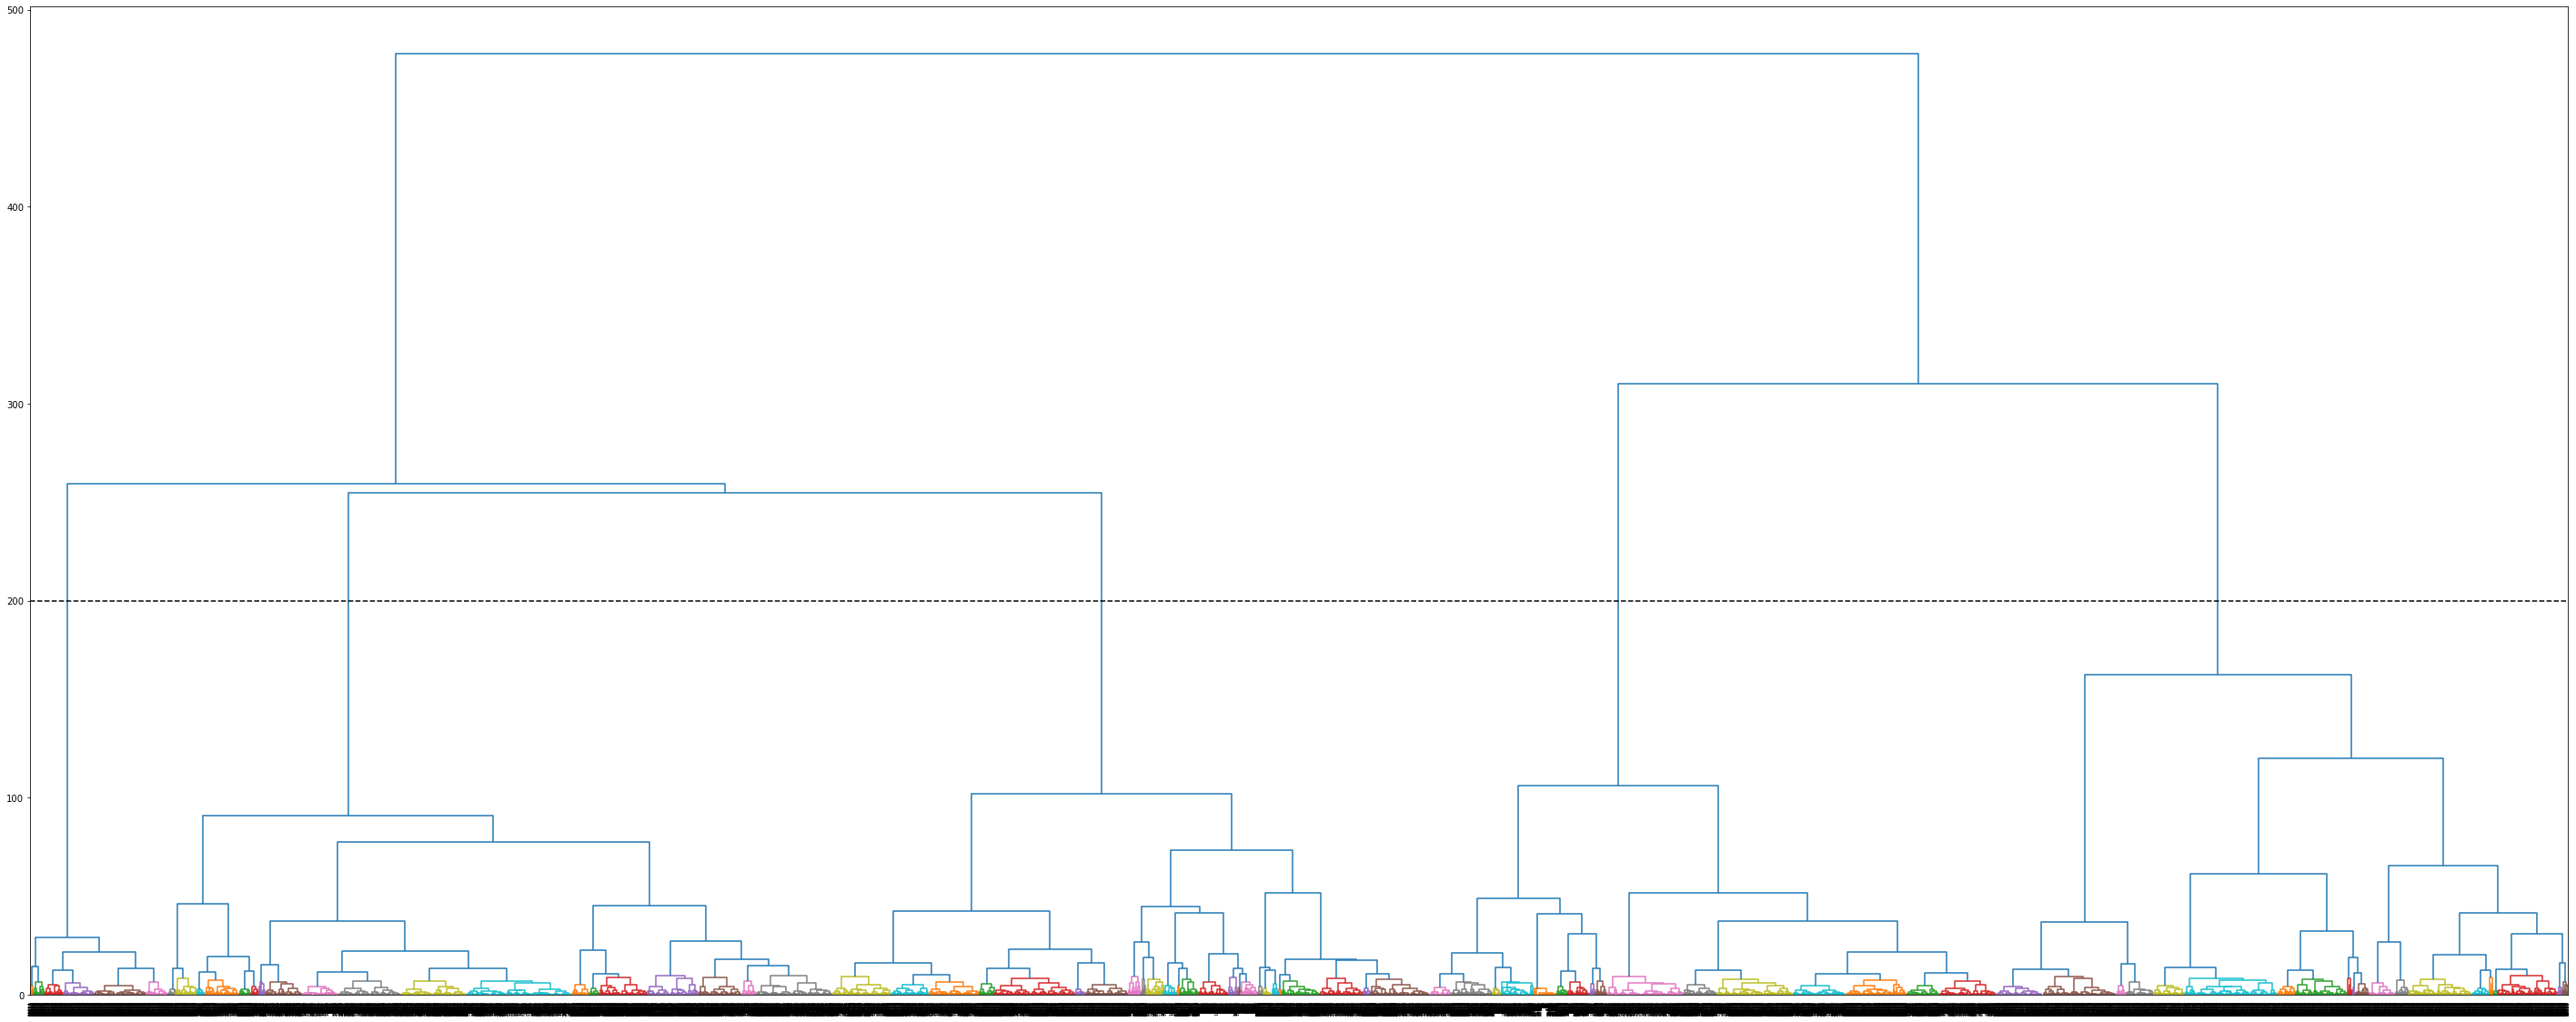

In [67]:
plt.figure(figsize=(50, 20))
dend = shc.dendrogram(shc.linkage(df_pca_scaled, method='ward'),color_threshold=10)
plt.axhline(200, color='black', linestyle='--')
plt.show()

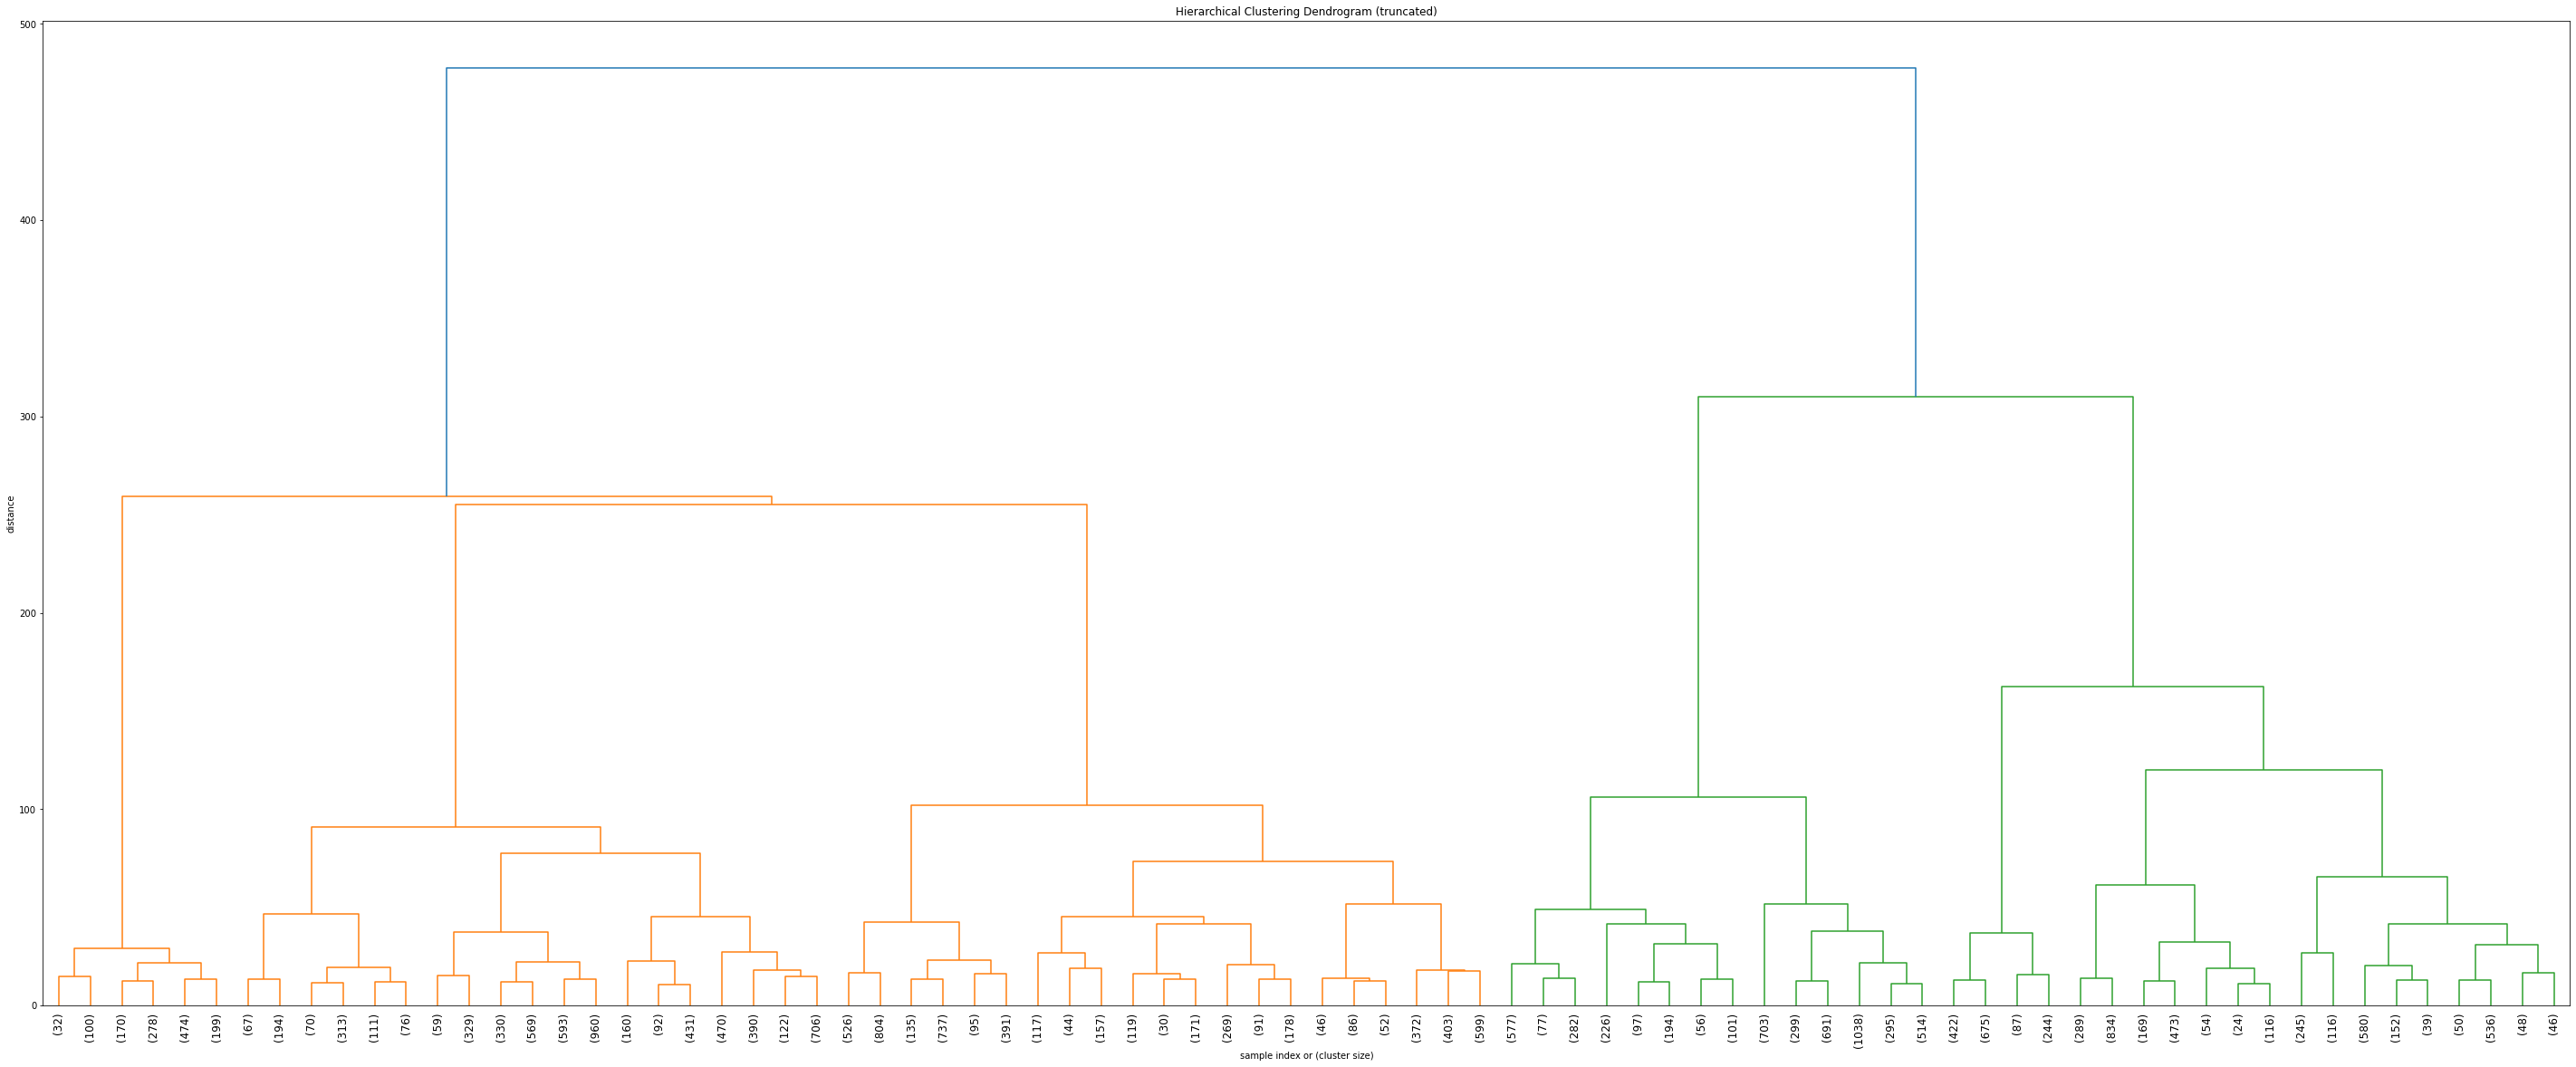

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(df_pca_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12 
)
plt.show()

1.6 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_pca_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [76]:
wcss

[299858.0000000003,
 183349.10202886086,
 130878.34788742856,
 95573.82185892039,
 61539.18998404842,
 51676.976334210645,
 44598.25849746795,
 39597.849558746275,
 36061.81194107829,
 32980.9541484433]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


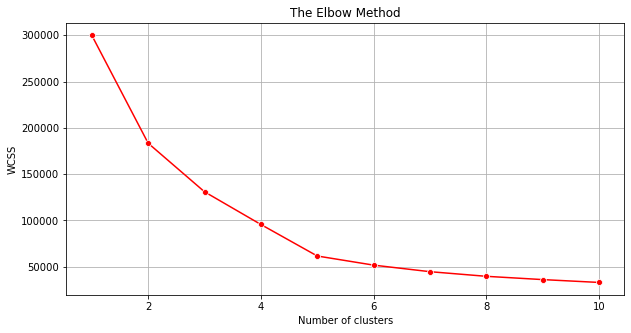

In [78]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set. 5 clusters were identified as an optimum number.

In [79]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [80]:
data_df["Clus_kmeans"] = labels
data_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,3
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,3
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,3
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,3
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,3


1.7 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.


In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [87]:
silhouette_score(df_pca_scaled,labels)

0.38572769619101077

In [88]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [89]:
silhouette_score(df_pca_scaled,labels)

0.3825486036570082

In [90]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [91]:
silhouette_score(df_pca_scaled,labels)

0.44534519247649795

In [92]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [93]:
silhouette_score(df_pca_scaled,labels)

0.5240956940501831

In [94]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [95]:
silhouette_score(df_pca_scaled,labels)

0.5221533662938636

In [96]:
k_means = KMeans(n_clusters = 7)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [97]:
silhouette_score(df_pca_scaled,labels)

0.5165635029478517

In [98]:
k_means = KMeans(n_clusters = 8)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [99]:
silhouette_score(df_pca_scaled,labels)

0.4797334335943954

In [100]:
k_means = KMeans(n_clusters = 9)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [101]:
silhouette_score(df_pca_scaled,labels)

0.48218920632873935

In [102]:
k_means = KMeans(n_clusters = 10)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [103]:
silhouette_score(df_pca_scaled,labels)

0.4405836527654705

As the silhoutte score is better for 5 clusters thus the optimum number of clusters are 5.

1.8 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].


Optimum number of clusters are 5 as sihoutte score is highest for 5 clusters.

In [104]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [105]:
silhouette_score(df_pca_scaled,labels)

0.5240956940501831

In [110]:
data_df["Clus_kmeans5"] = labels
data_df_cluster = data_df.drop(['Clus_kmeans'], axis = 1)
data_df_cluster

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07,3
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04,3
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05,3
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07,0


In [115]:
df_kclust_5 = data_df_cluster.groupby('Clus_kmeans5').mean()
cluster_5_freq = data_df['Clus_kmeans5'].value_counts().sort_index()
df_kclust_5['cluster count'] = cluster_5_freq
df_kclust_5

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster count
Clus_kmeans5,,,,,,,,,,,,,,
0,143.280809,572.103004,76597.026364,3.209356e+04,1.962406e+04,1.349204e+04,1914.448804,209.162609,0.349988,135.993379,16.037897,14.693481,0.102794,6524
1,465.781944,199.148989,75176.566354,1.038821e+07,5.625808e+06,5.447310e+06,11245.754810,8646.647997,0.290439,6373.659814,0.217242,1.573280,0.760929,4054
2,421.696255,152.001594,55008.841434,1.810314e+06,8.642623e+05,8.262209e+05,3263.131952,1500.090563,0.349264,977.424163,0.404392,1.788731,0.544614,6275
3,683.825492,303.785287,206160.821215,2.513465e+05,1.375509e+05,1.167714e+05,14406.540205,1252.285569,0.349538,815.541831,13.857220,12.098200,0.090012,4676
4,141.454782,572.446324,75614.834092,8.063284e+05,5.668641e+05,4.781485e+05,65315.176318,6990.360898,0.288302,5017.538285,13.752664,15.385753,0.111918,1537


Cluster 0: Lowest Revenue earning advertisement with highest CTR, higher CPM ,lower CPC, highest fee but least spending & lowest clicks. 

Cluster 1: Highest Revenue earning advertisement with lowest CTR, lowest CPM ,highest CPC, low fee but highest spending with 3rd highest clicks. 

Cluster 2: 3rd highest Revenue earning advertisement with low CTR, low CPM ,high CPC, high fee but lesser spending & low clicks. 

Cluster 3: Lower Revenue earning advertisement with higher CTR, high CPM ,least CPC, higher fee but less spending & higher clicks. 

Cluster 4: 2nd highest Revenue earning advertisement with high CTR, highest CPM ,low CPC, lowest fee but higher spending & highest clicks. 

<AxesSubplot:xlabel='Device Type', ylabel='count'>

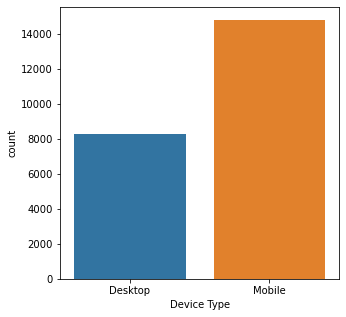

In [123]:
plt.figure(figsize=(5,5))
sns.countplot(x='Device Type', data=data_df)

Mobile type advertisement has the most count hence leading to greater revenue and highest number of clicks.

1.9 - Clustering: Conclude the project by providing summary of your learnings.

1. Ads in Cluster 0 has lowest Revenue earning advertisement with highest CTR, higher CPM ,lower CPC, highest fee but least spending & lowest clicks. So it needs to improve in making the Ads more attractive. As the Fees is highest thus leading to lowest clicks . So, can promote offers on such Ads to increase revenue.


2. Ads in Cluster 1 has highest Revenue earning advertisement with lowest CTR, lowest CPM ,highest CPC, low fee but highest spending with 3rd highest clicks. Such ads should be prefered as they are having low fee but highest revenue generating Ads, these types of Ads are needed for mobile device type Ads to increase number of clicks hence to increase more revenue.


3.  Ads in Cluster 2 has 3rd highest Revenue earning advertisement with low CTR, low CPM ,high CPC, high fee but lesser spending & low clicks. As the fee is high thus leading to low clicks , more attractive Ads are needed to increase clicks and increase revenue.

4. Ads in Cluster 3 has Lower Revenue earning advertisement with higher CTR, high CPM ,least CPC, higher fee but less spending & higher clicks. These type of Ads are not generating much revenue but they have higher clicks thus there is a need to provide more offers on such Ads to increase revenue.


5. Ads in Cluster 4 has 2nd highest Revenue earning advertisement with high CTR, highest CPM ,low CPC, lowest fee but higher spending & highest clicks. Such Ads are generating good revenue amount but they have highest CPM so cost should be reduced to increase more revenue.

6. Larger Ad Size doesn't seem to have greater impact on revenue. Cluster 3 Ads has extremely large Mean Ad size but still are lower revenue earning advertisement thus Ad size should be reduced as cost can be reduced thus leading to more revenue.

Problem 2
PCA:
PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

2.1 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.


In [3]:
df = pd.read_excel("PCA+India+Data_Census.xlsx")

In [4]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [10]:
len(df.columns)

61

2.2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F.


In [11]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

59

In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of State Code
----------------------------------------------------------------------------
count    640.000000
mean      17.114062
std        9.426486
min        1.000000
25%        9.000000
50%       18.000000
75%       24.000000
max       35.000000
Name: State Code, dtype: float64 Distribution of State Code
----------------------------------------------------------------------------


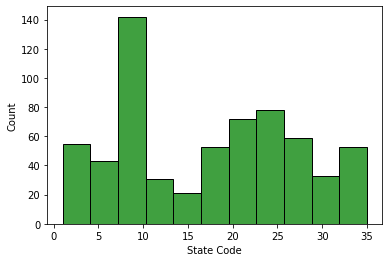

BoxPlot of State Code
----------------------------------------------------------------------------


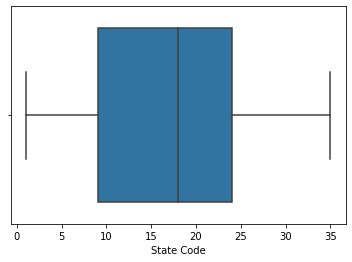

Description of Dist.Code
----------------------------------------------------------------------------
count    640.000000
mean     320.500000
std      184.896367
min        1.000000
25%      160.750000
50%      320.500000
75%      480.250000
max      640.000000
Name: Dist.Code, dtype: float64 Distribution of Dist.Code
----------------------------------------------------------------------------


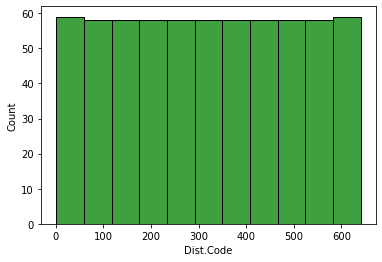

BoxPlot of Dist.Code
----------------------------------------------------------------------------


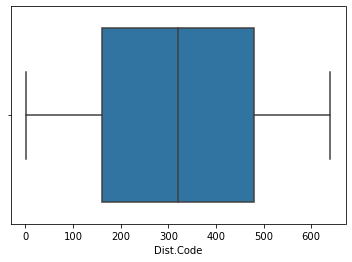

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------


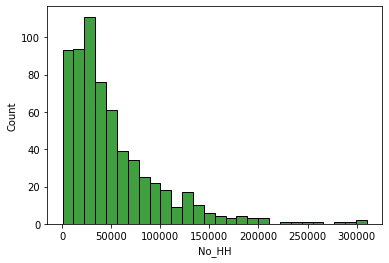

BoxPlot of No_HH
----------------------------------------------------------------------------


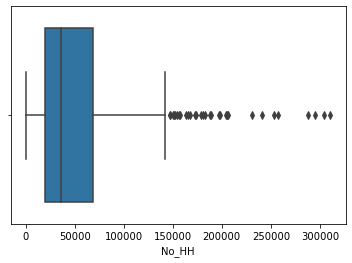

Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M
----------------------------------------------------------------------------


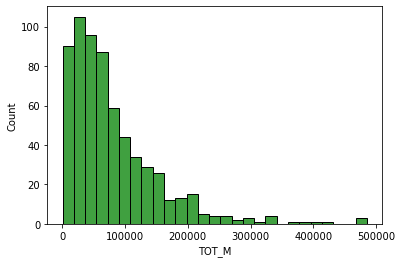

BoxPlot of TOT_M
----------------------------------------------------------------------------


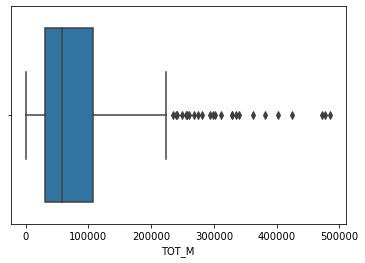

Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F
----------------------------------------------------------------------------


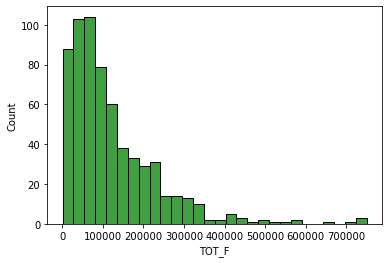

BoxPlot of TOT_F
----------------------------------------------------------------------------


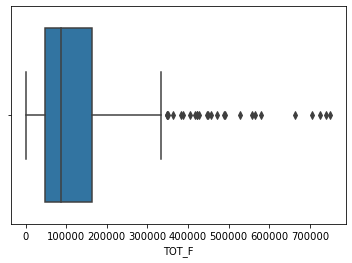

Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06
----------------------------------------------------------------------------


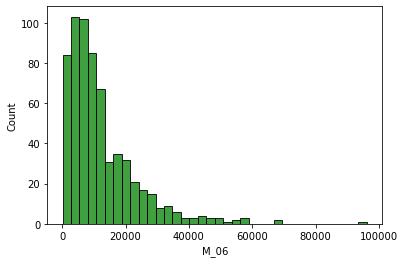

BoxPlot of M_06
----------------------------------------------------------------------------


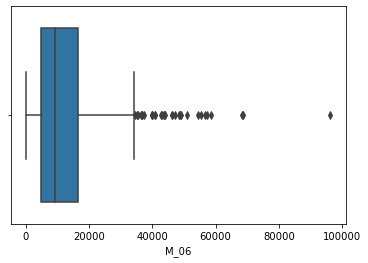

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06
----------------------------------------------------------------------------


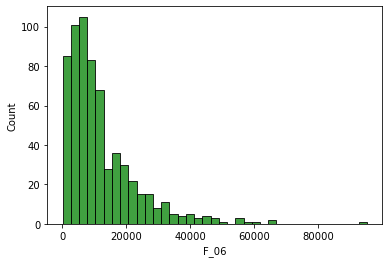

BoxPlot of F_06
----------------------------------------------------------------------------


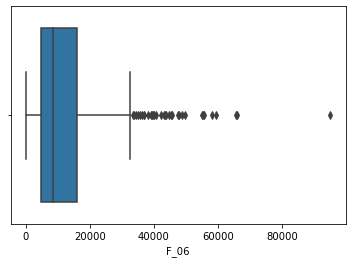

Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC
----------------------------------------------------------------------------


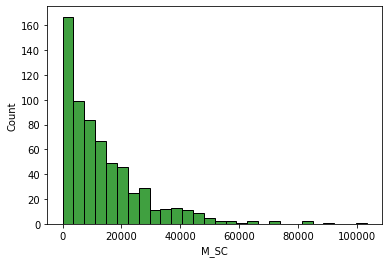

BoxPlot of M_SC
----------------------------------------------------------------------------


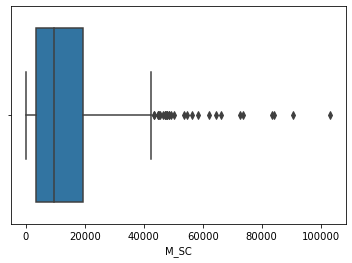

Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC
----------------------------------------------------------------------------


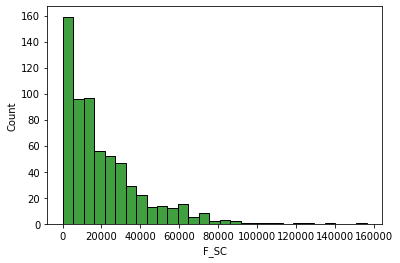

BoxPlot of F_SC
----------------------------------------------------------------------------


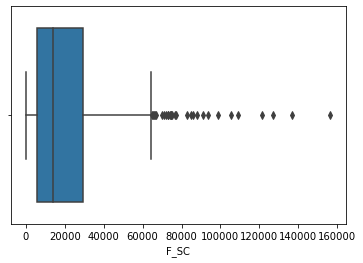

Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST
----------------------------------------------------------------------------


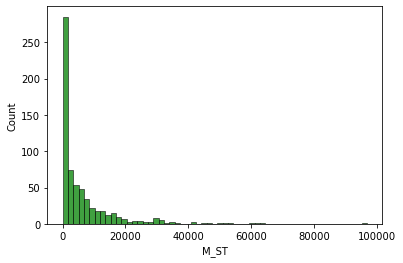

BoxPlot of M_ST
----------------------------------------------------------------------------


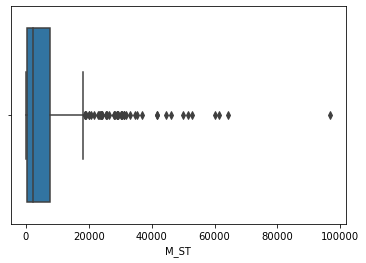

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST
----------------------------------------------------------------------------


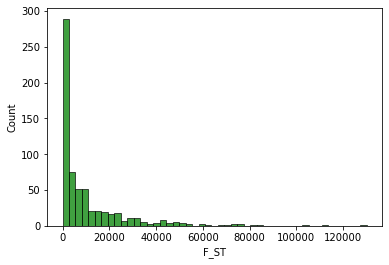

BoxPlot of F_ST
----------------------------------------------------------------------------


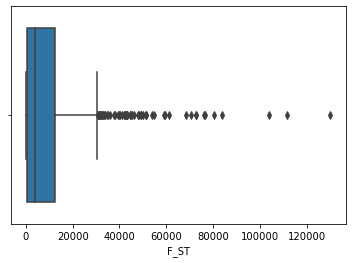

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------


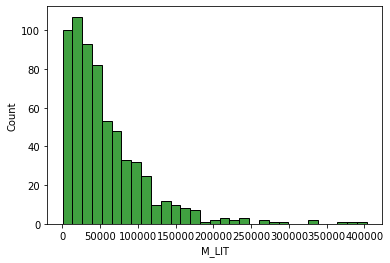

BoxPlot of M_LIT
----------------------------------------------------------------------------


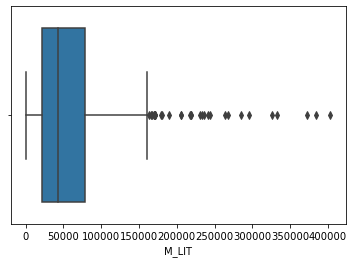

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT
----------------------------------------------------------------------------


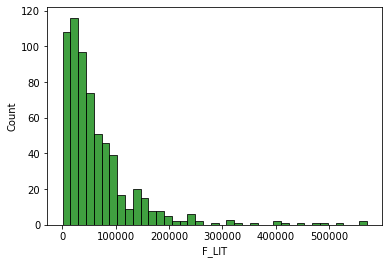

BoxPlot of F_LIT
----------------------------------------------------------------------------


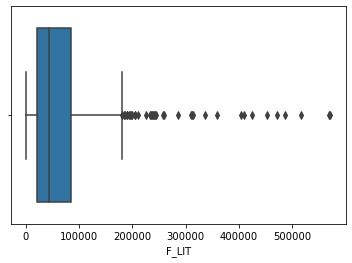

Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL
----------------------------------------------------------------------------


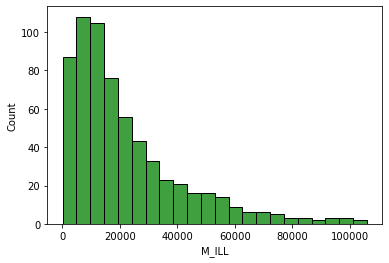

BoxPlot of M_ILL
----------------------------------------------------------------------------


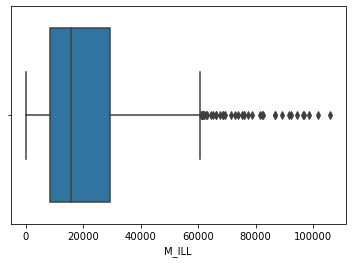

Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL
----------------------------------------------------------------------------


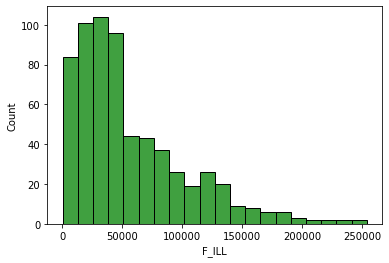

BoxPlot of F_ILL
----------------------------------------------------------------------------


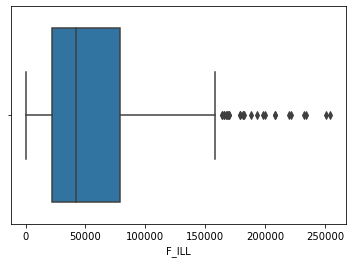

Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M
----------------------------------------------------------------------------


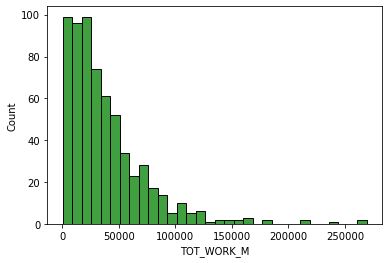

BoxPlot of TOT_WORK_M
----------------------------------------------------------------------------


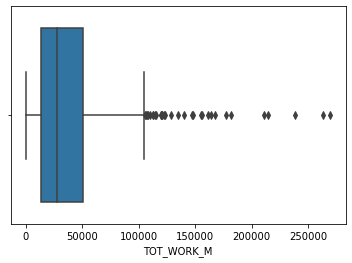

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------


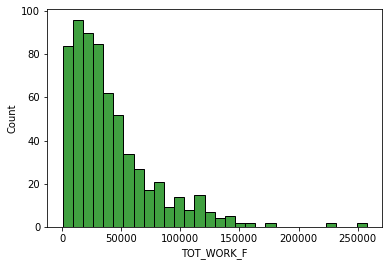

BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


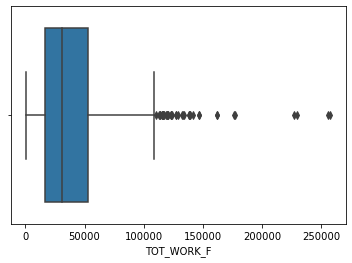

Description of MAINWORK_M
----------------------------------------------------------------------------
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 Distribution of MAINWORK_M
----------------------------------------------------------------------------


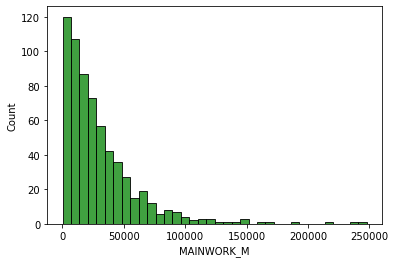

BoxPlot of MAINWORK_M
----------------------------------------------------------------------------


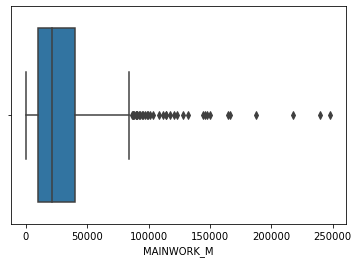

Description of MAINWORK_F
----------------------------------------------------------------------------
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 Distribution of MAINWORK_F
----------------------------------------------------------------------------


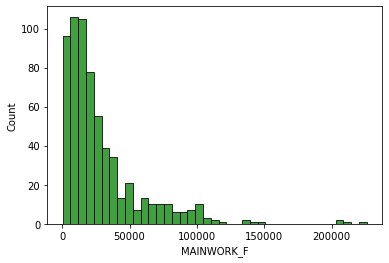

BoxPlot of MAINWORK_F
----------------------------------------------------------------------------


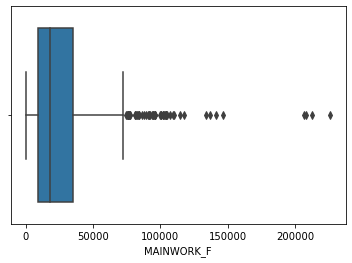

Description of MAIN_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 Distribution of MAIN_CL_M
----------------------------------------------------------------------------


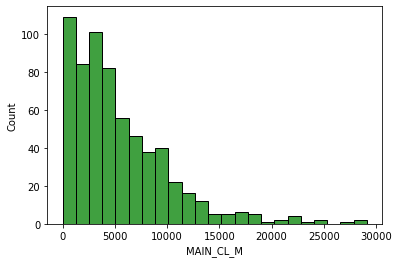

BoxPlot of MAIN_CL_M
----------------------------------------------------------------------------


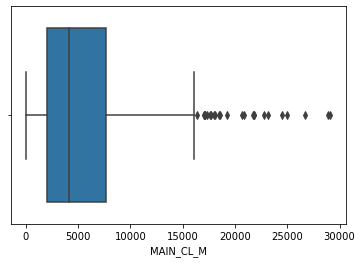

Description of MAIN_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 Distribution of MAIN_CL_F
----------------------------------------------------------------------------


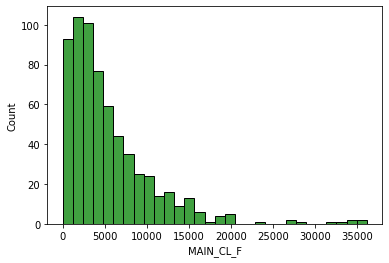

BoxPlot of MAIN_CL_F
----------------------------------------------------------------------------


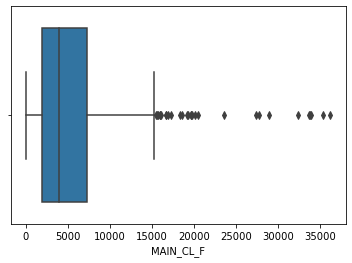

Description of MAIN_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 Distribution of MAIN_AL_M
----------------------------------------------------------------------------


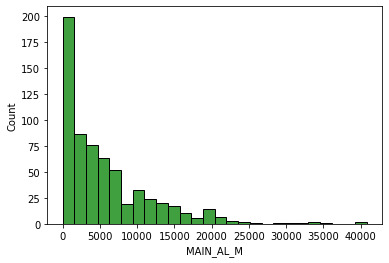

BoxPlot of MAIN_AL_M
----------------------------------------------------------------------------


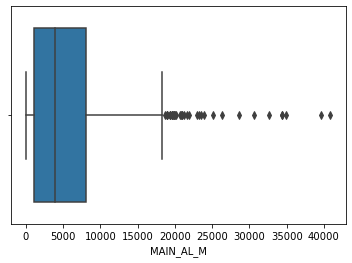

Description of MAIN_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 Distribution of MAIN_AL_F
----------------------------------------------------------------------------


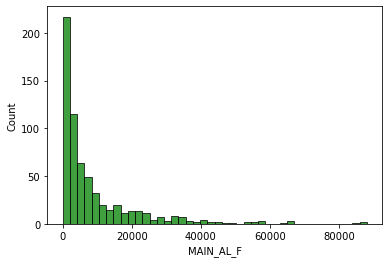

BoxPlot of MAIN_AL_F
----------------------------------------------------------------------------


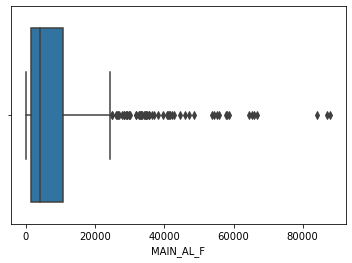

Description of MAIN_HH_M
----------------------------------------------------------------------------
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 Distribution of MAIN_HH_M
----------------------------------------------------------------------------


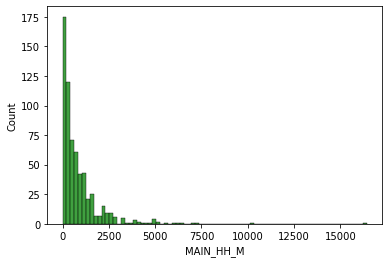

BoxPlot of MAIN_HH_M
----------------------------------------------------------------------------


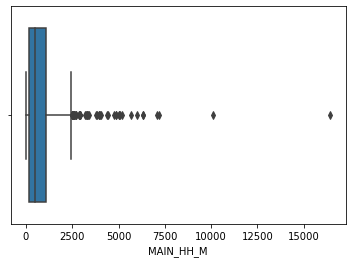

Description of MAIN_HH_F
----------------------------------------------------------------------------
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 Distribution of MAIN_HH_F
----------------------------------------------------------------------------


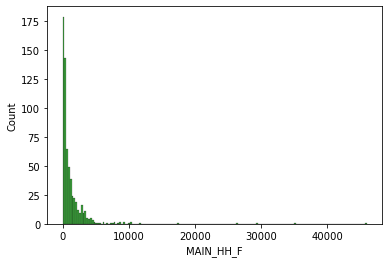

BoxPlot of MAIN_HH_F
----------------------------------------------------------------------------


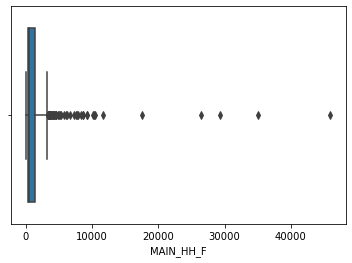

Description of MAIN_OT_M
----------------------------------------------------------------------------
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 Distribution of MAIN_OT_M
----------------------------------------------------------------------------


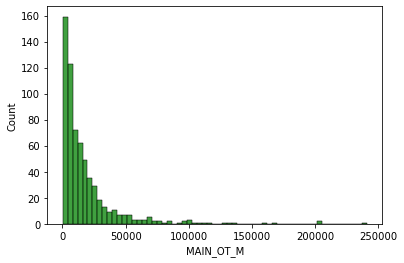

BoxPlot of MAIN_OT_M
----------------------------------------------------------------------------


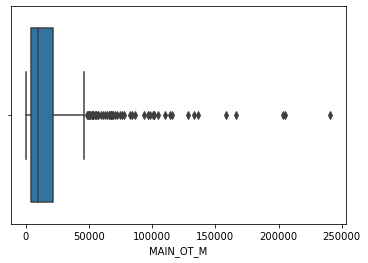

Description of MAIN_OT_F
----------------------------------------------------------------------------
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 Distribution of MAIN_OT_F
----------------------------------------------------------------------------


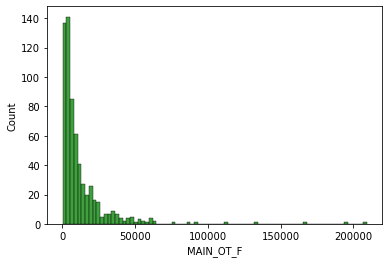

BoxPlot of MAIN_OT_F
----------------------------------------------------------------------------


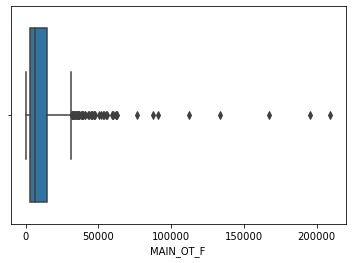

Description of MARGWORK_M
----------------------------------------------------------------------------
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64 Distribution of MARGWORK_M
----------------------------------------------------------------------------


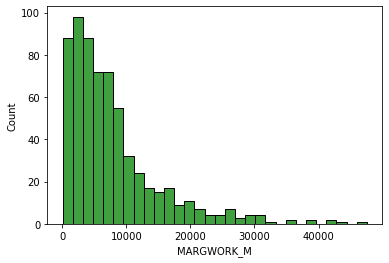

BoxPlot of MARGWORK_M
----------------------------------------------------------------------------


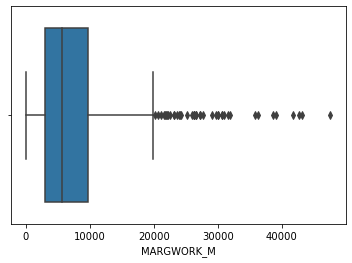

Description of MARGWORK_F
----------------------------------------------------------------------------
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64 Distribution of MARGWORK_F
----------------------------------------------------------------------------


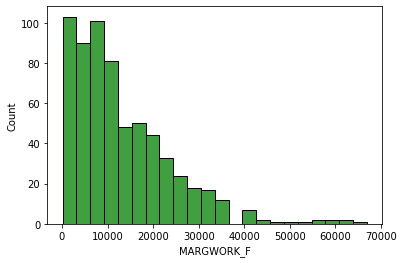

BoxPlot of MARGWORK_F
----------------------------------------------------------------------------


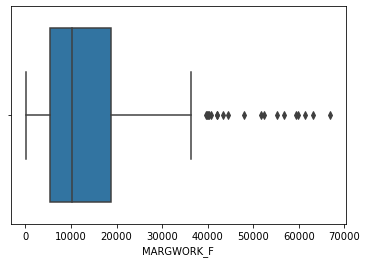

Description of MARG_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64 Distribution of MARG_CL_M
----------------------------------------------------------------------------


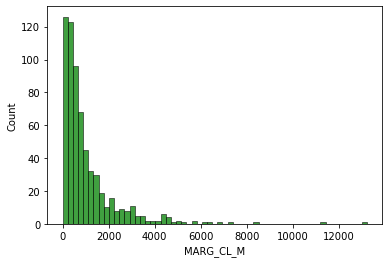

BoxPlot of MARG_CL_M
----------------------------------------------------------------------------


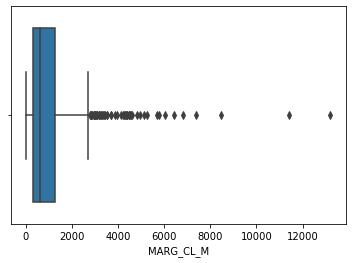

Description of MARG_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64 Distribution of MARG_CL_F
----------------------------------------------------------------------------


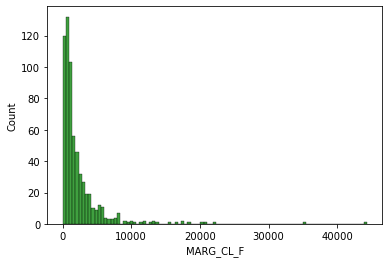

BoxPlot of MARG_CL_F
----------------------------------------------------------------------------


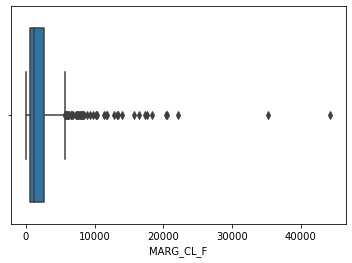

Description of MARG_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64 Distribution of MARG_AL_M
----------------------------------------------------------------------------


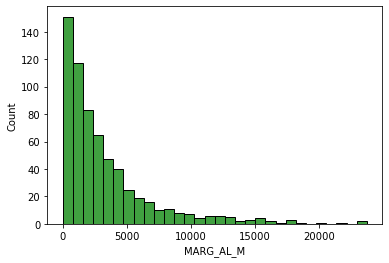

BoxPlot of MARG_AL_M
----------------------------------------------------------------------------


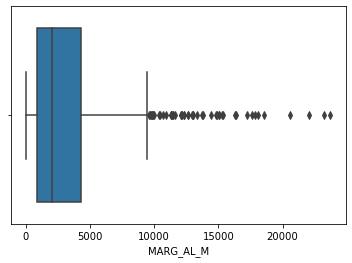

Description of MARG_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64 Distribution of MARG_AL_F
----------------------------------------------------------------------------


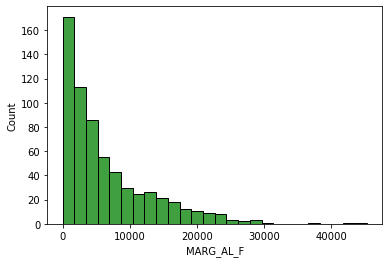

BoxPlot of MARG_AL_F
----------------------------------------------------------------------------


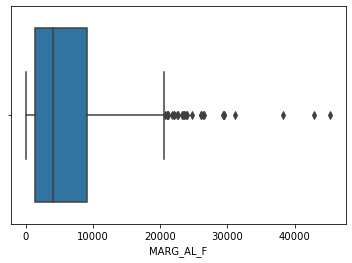

Description of MARG_HH_M
----------------------------------------------------------------------------
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64 Distribution of MARG_HH_M
----------------------------------------------------------------------------


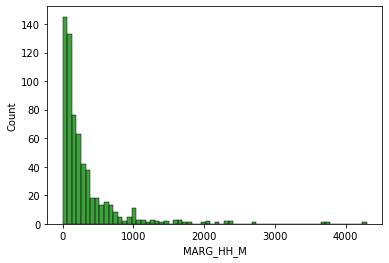

BoxPlot of MARG_HH_M
----------------------------------------------------------------------------


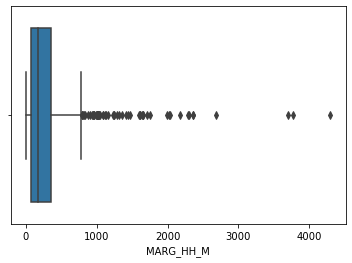

Description of MARG_HH_F
----------------------------------------------------------------------------
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64 Distribution of MARG_HH_F
----------------------------------------------------------------------------


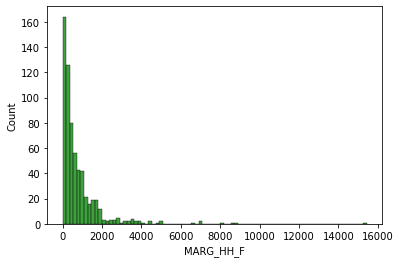

BoxPlot of MARG_HH_F
----------------------------------------------------------------------------


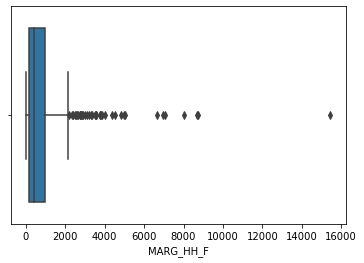

Description of MARG_OT_M
----------------------------------------------------------------------------
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64 Distribution of MARG_OT_M
----------------------------------------------------------------------------


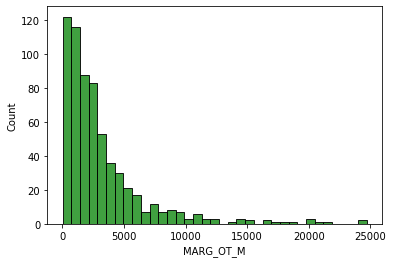

BoxPlot of MARG_OT_M
----------------------------------------------------------------------------


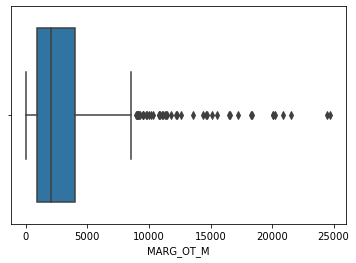

Description of MARG_OT_F
----------------------------------------------------------------------------
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64 Distribution of MARG_OT_F
----------------------------------------------------------------------------


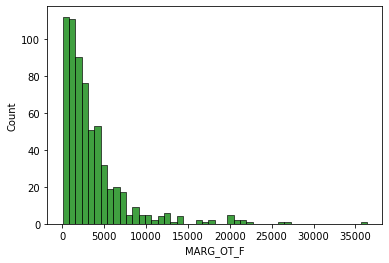

BoxPlot of MARG_OT_F
----------------------------------------------------------------------------


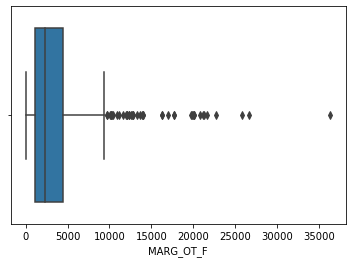

Description of MARGWORK_3_6_M
----------------------------------------------------------------------------
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64 Distribution of MARGWORK_3_6_M
----------------------------------------------------------------------------


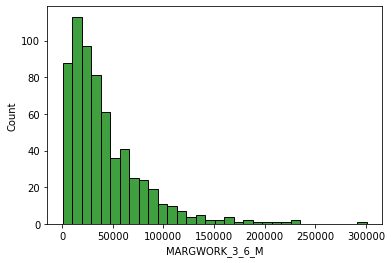

BoxPlot of MARGWORK_3_6_M
----------------------------------------------------------------------------


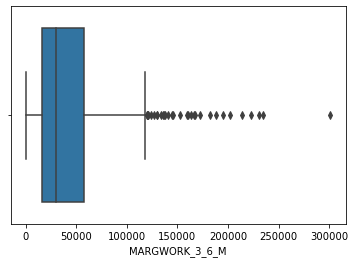

Description of MARGWORK_3_6_F
----------------------------------------------------------------------------
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64 Distribution of MARGWORK_3_6_F
----------------------------------------------------------------------------


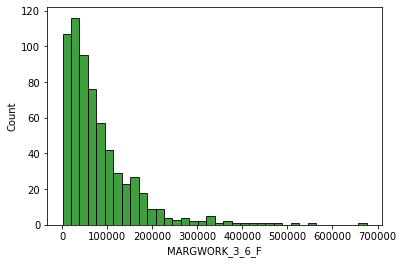

BoxPlot of MARGWORK_3_6_F
----------------------------------------------------------------------------


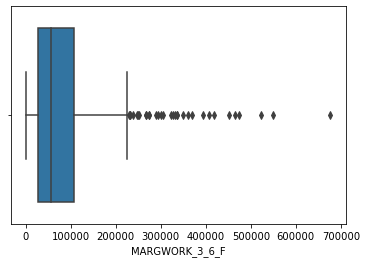

Description of MARG_CL_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64 Distribution of MARG_CL_3_6_M
----------------------------------------------------------------------------


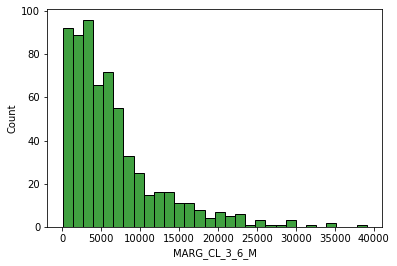

BoxPlot of MARG_CL_3_6_M
----------------------------------------------------------------------------


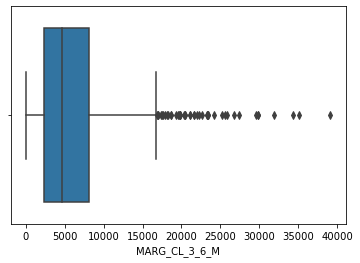

Description of MARG_CL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64 Distribution of MARG_CL_3_6_F
----------------------------------------------------------------------------


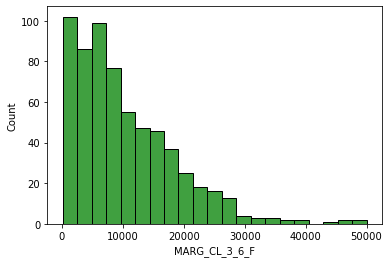

BoxPlot of MARG_CL_3_6_F
----------------------------------------------------------------------------


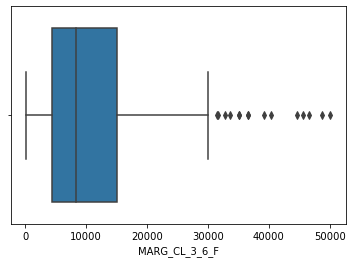

Description of MARG_AL_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64 Distribution of MARG_AL_3_6_M
----------------------------------------------------------------------------


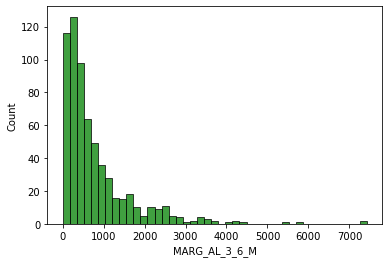

BoxPlot of MARG_AL_3_6_M
----------------------------------------------------------------------------


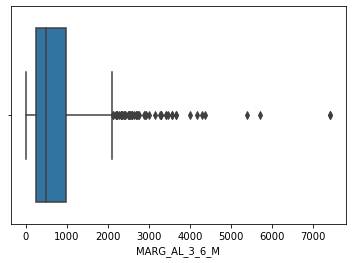

Description of MARG_AL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64 Distribution of MARG_AL_3_6_F
----------------------------------------------------------------------------


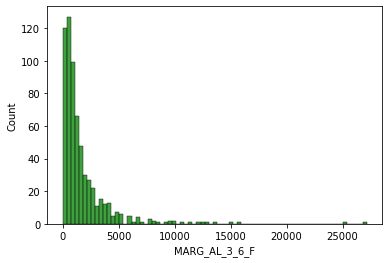

BoxPlot of MARG_AL_3_6_F
----------------------------------------------------------------------------


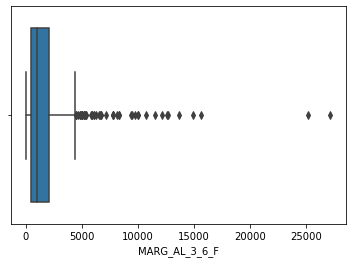

Description of MARG_HH_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64 Distribution of MARG_HH_3_6_M
----------------------------------------------------------------------------


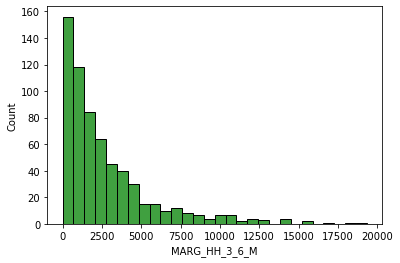

BoxPlot of MARG_HH_3_6_M
----------------------------------------------------------------------------


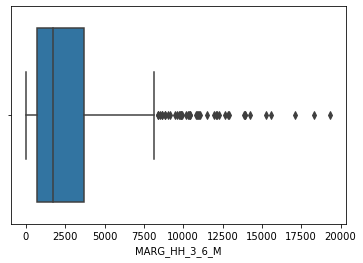

Description of MARG_HH_3_6_F
----------------------------------------------------------------------------
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64 Distribution of MARG_HH_3_6_F
----------------------------------------------------------------------------


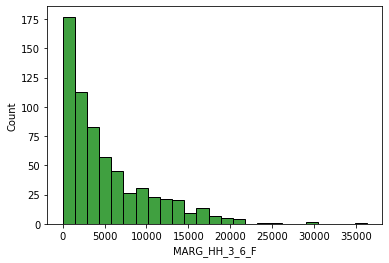

BoxPlot of MARG_HH_3_6_F
----------------------------------------------------------------------------


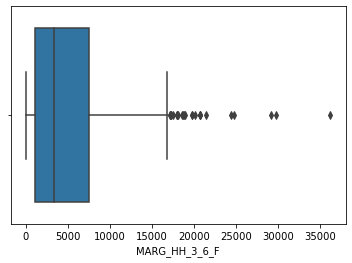

Description of MARG_OT_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64 Distribution of MARG_OT_3_6_M
----------------------------------------------------------------------------


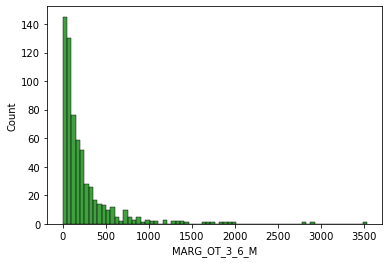

BoxPlot of MARG_OT_3_6_M
----------------------------------------------------------------------------


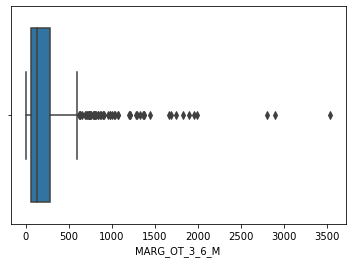

Description of MARG_OT_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64 Distribution of MARG_OT_3_6_F
----------------------------------------------------------------------------


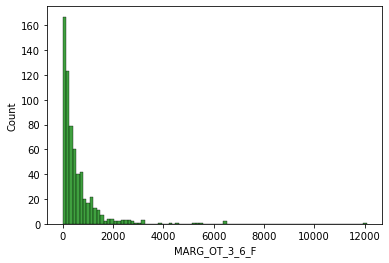

BoxPlot of MARG_OT_3_6_F
----------------------------------------------------------------------------


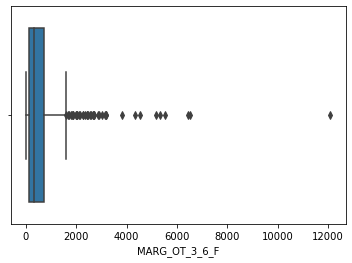

Description of MARGWORK_0_3_M
----------------------------------------------------------------------------
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64 Distribution of MARGWORK_0_3_M
----------------------------------------------------------------------------


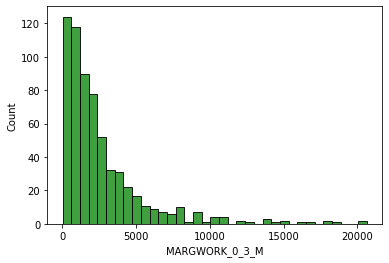

BoxPlot of MARGWORK_0_3_M
----------------------------------------------------------------------------


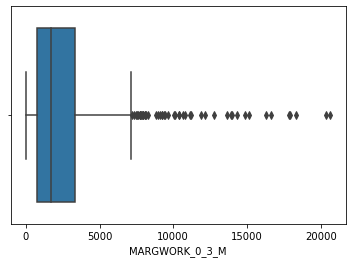

Description of MARGWORK_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64 Distribution of MARGWORK_0_3_F
----------------------------------------------------------------------------


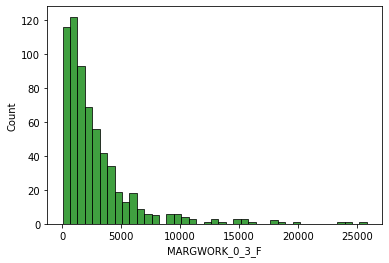

BoxPlot of MARGWORK_0_3_F
----------------------------------------------------------------------------


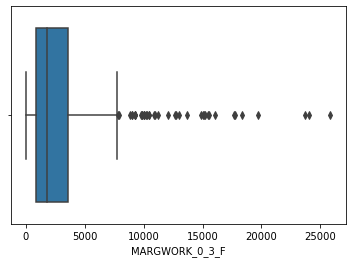

Description of MARG_CL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64 Distribution of MARG_CL_0_3_M
----------------------------------------------------------------------------


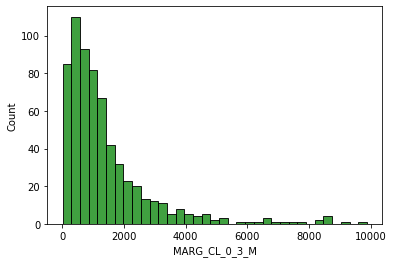

BoxPlot of MARG_CL_0_3_M
----------------------------------------------------------------------------


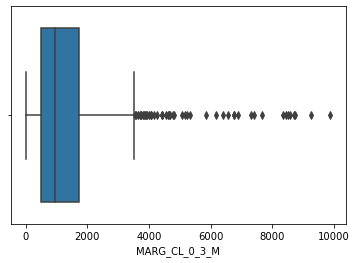

Description of MARG_CL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64 Distribution of MARG_CL_0_3_F
----------------------------------------------------------------------------


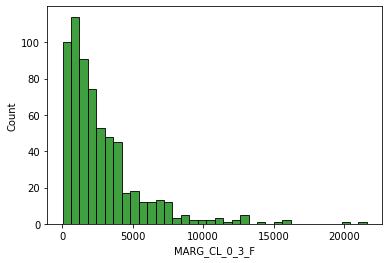

BoxPlot of MARG_CL_0_3_F
----------------------------------------------------------------------------


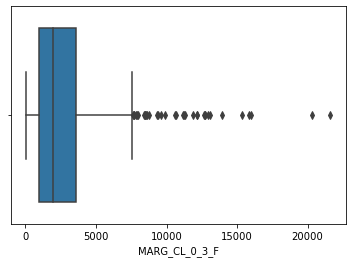

Description of MARG_AL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64 Distribution of MARG_AL_0_3_M
----------------------------------------------------------------------------


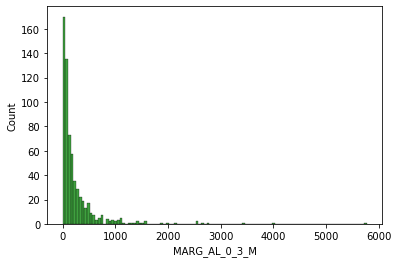

BoxPlot of MARG_AL_0_3_M
----------------------------------------------------------------------------


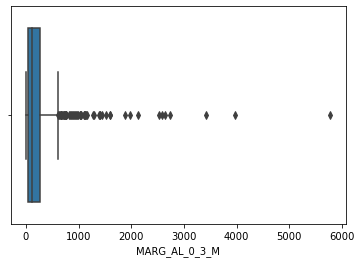

Description of MARG_AL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64 Distribution of MARG_AL_0_3_F
----------------------------------------------------------------------------


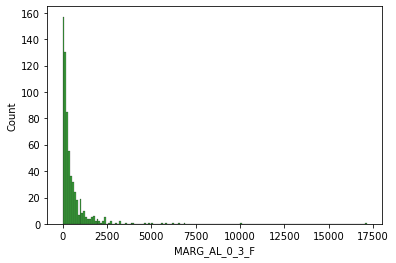

BoxPlot of MARG_AL_0_3_F
----------------------------------------------------------------------------


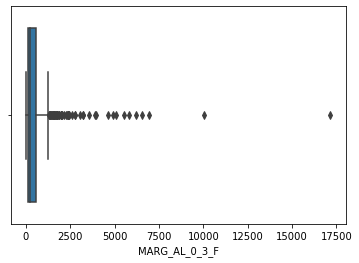

Description of MARG_HH_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64 Distribution of MARG_HH_0_3_M
----------------------------------------------------------------------------


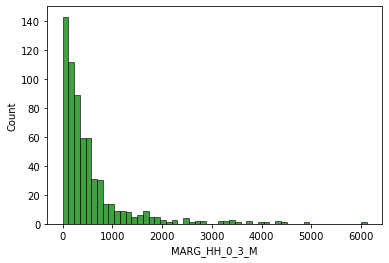

BoxPlot of MARG_HH_0_3_M
----------------------------------------------------------------------------


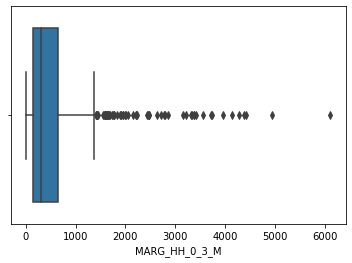

Description of MARG_HH_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64 Distribution of MARG_HH_0_3_F
----------------------------------------------------------------------------


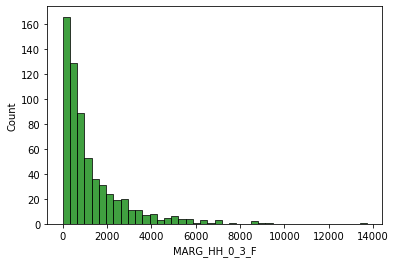

BoxPlot of MARG_HH_0_3_F
----------------------------------------------------------------------------


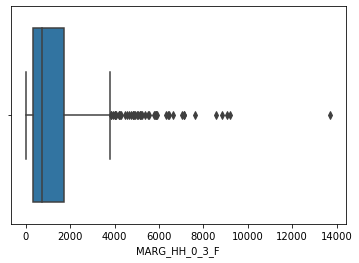

Description of MARG_OT_0_3_M
----------------------------------------------------------------------------
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64 Distribution of MARG_OT_0_3_M
----------------------------------------------------------------------------


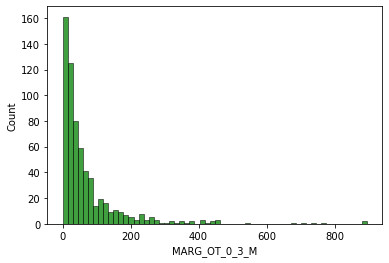

BoxPlot of MARG_OT_0_3_M
----------------------------------------------------------------------------


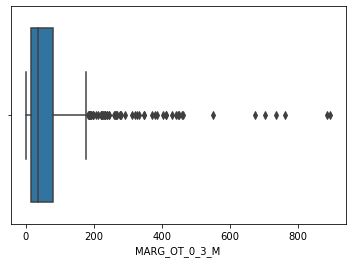

Description of MARG_OT_0_3_F
----------------------------------------------------------------------------
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64 Distribution of MARG_OT_0_3_F
----------------------------------------------------------------------------


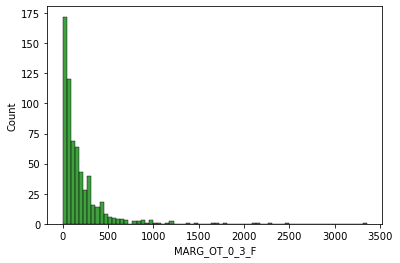

BoxPlot of MARG_OT_0_3_F
----------------------------------------------------------------------------


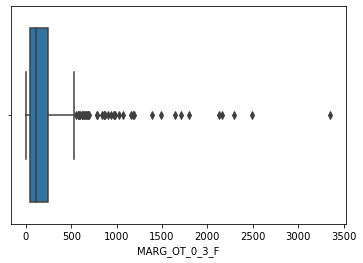

Description of NON_WORK_M
----------------------------------------------------------------------------
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64 Distribution of NON_WORK_M
----------------------------------------------------------------------------


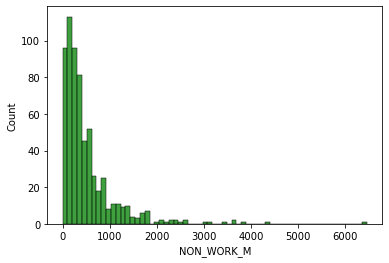

BoxPlot of NON_WORK_M
----------------------------------------------------------------------------


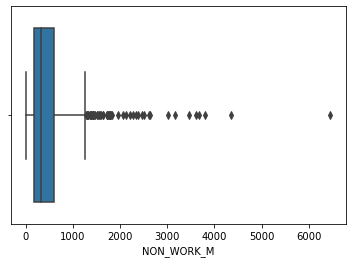

Description of NON_WORK_F
----------------------------------------------------------------------------
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64 Distribution of NON_WORK_F
----------------------------------------------------------------------------


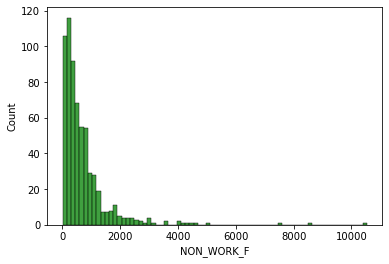

BoxPlot of NON_WORK_F
----------------------------------------------------------------------------


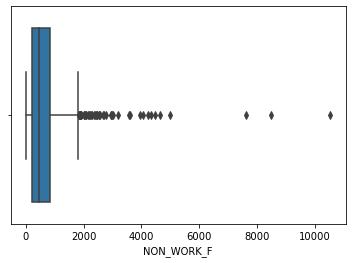

In [13]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [14]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

Details of State
----------------------------------------------------------------
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar I

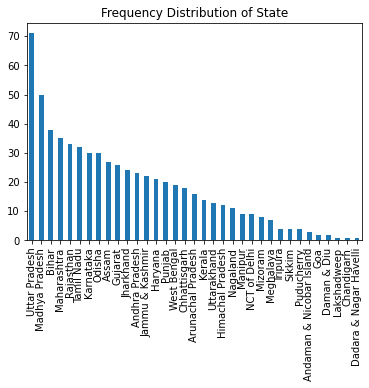

       
Details of Area Name
----------------------------------------------------------------
Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64


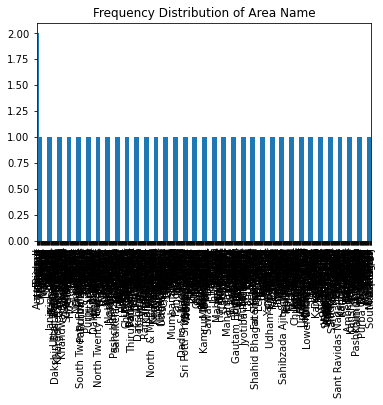

In [15]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

2.3 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

In [6]:
df_new = df.drop(['State','Area Name'], axis = 1)

In [7]:
df_new

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,32,47,0,0,0,0,0,0,32,47
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,155,337,3,14,38,130,4,23,110,170
637,35,638,1275,1549,2630,227,225,0,0,1012,...,104,134,9,4,2,6,17,47,76,77
638,35,639,3762,5200,8012,723,664,0,0,28,...,136,172,24,44,11,21,1,4,100,103


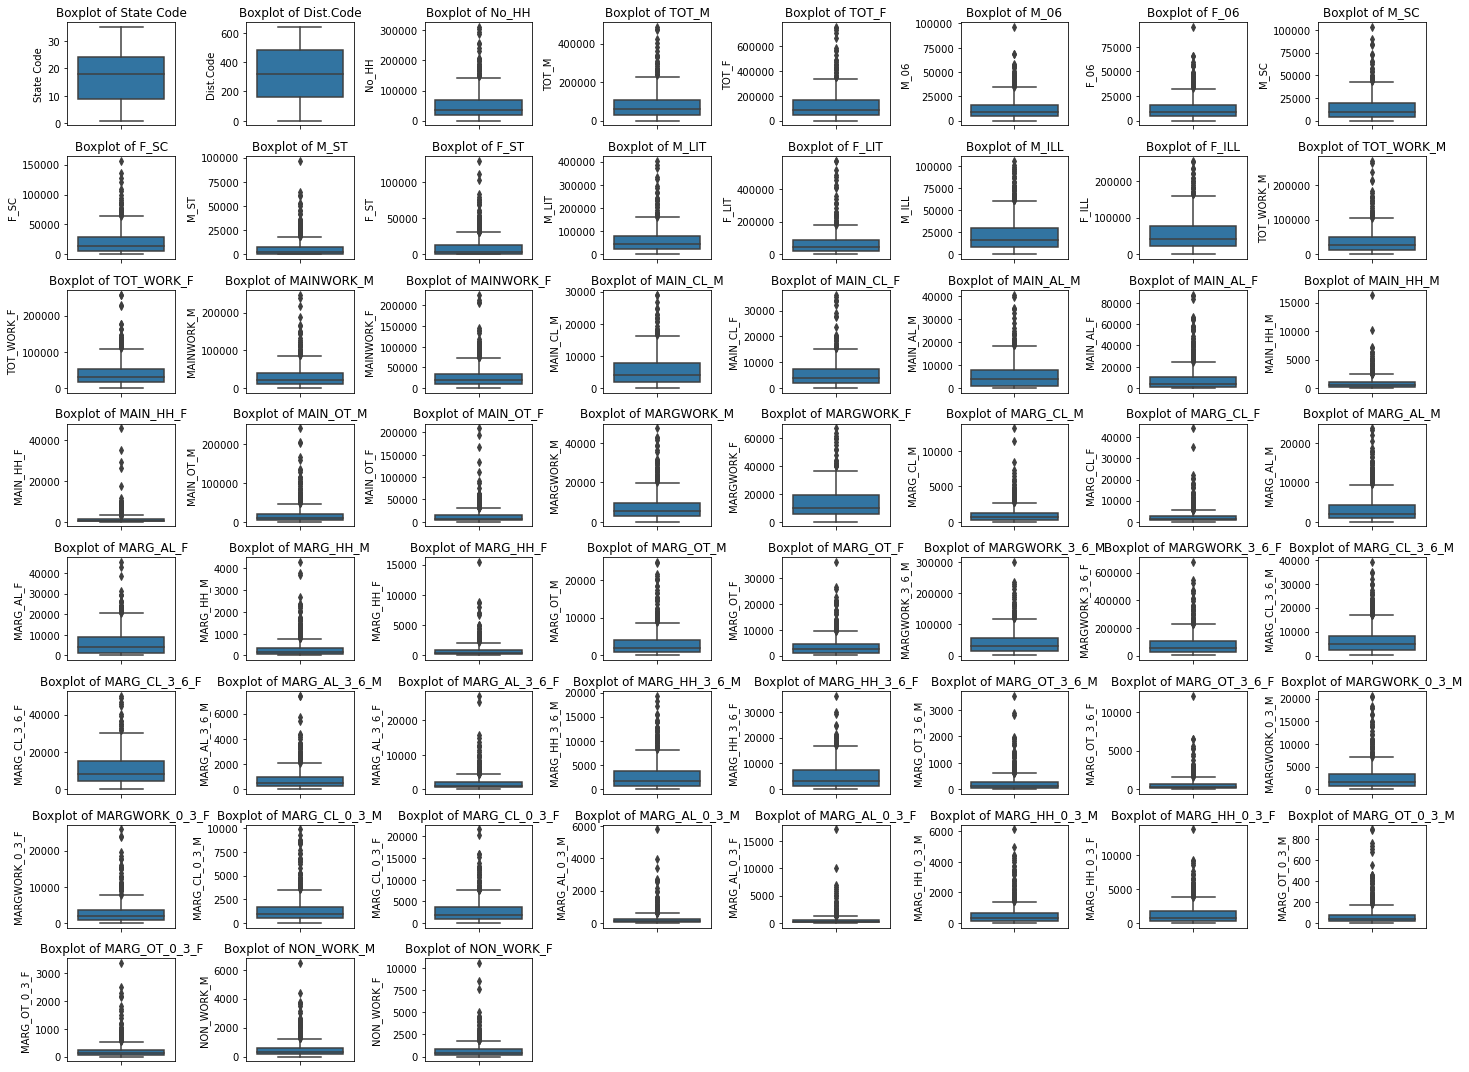

In [8]:
plt.figure(figsize = (20,15))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(8, 8, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

No treating outliers is not necessary in this case as you never eliminate outliers unless they are the result from a processing mistake or wrong measurement. True outliers must be kept in the data while doing PCA.

2.4 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [9]:
from scipy.stats import zscore
df_num_scaled=df_new.apply(zscore)
df_num_scaled.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


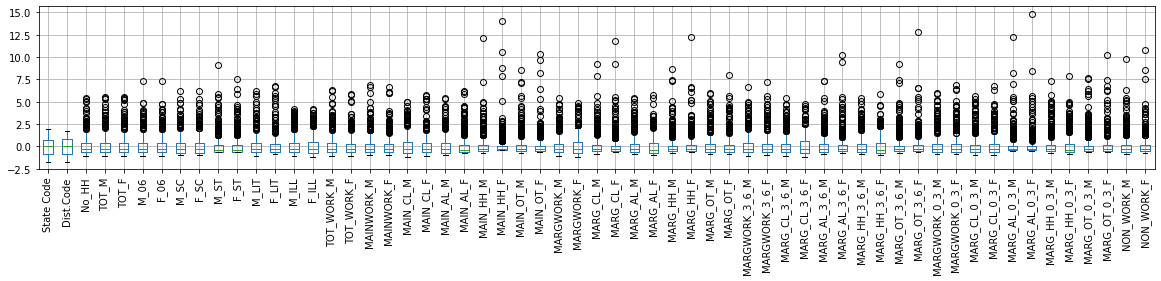

In [10]:
#BOXPLOT AFTER SCALING
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

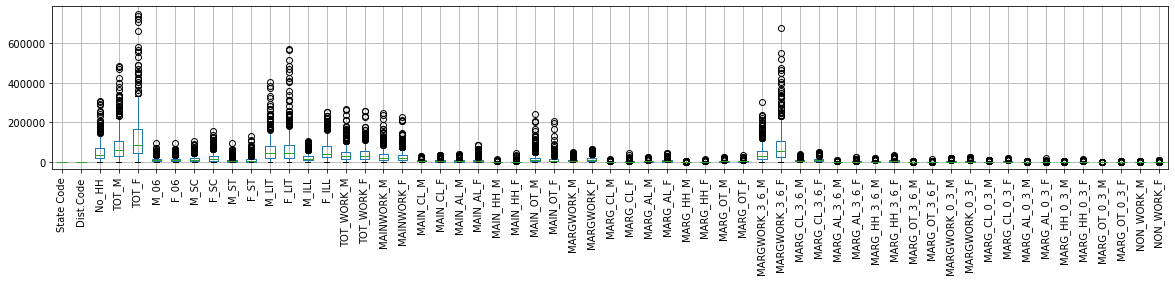

In [11]:
#BOXPLOT BEFORE SCALING
df_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

As we can see scaling does have an impact on outliers.

2.5 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigenvector.

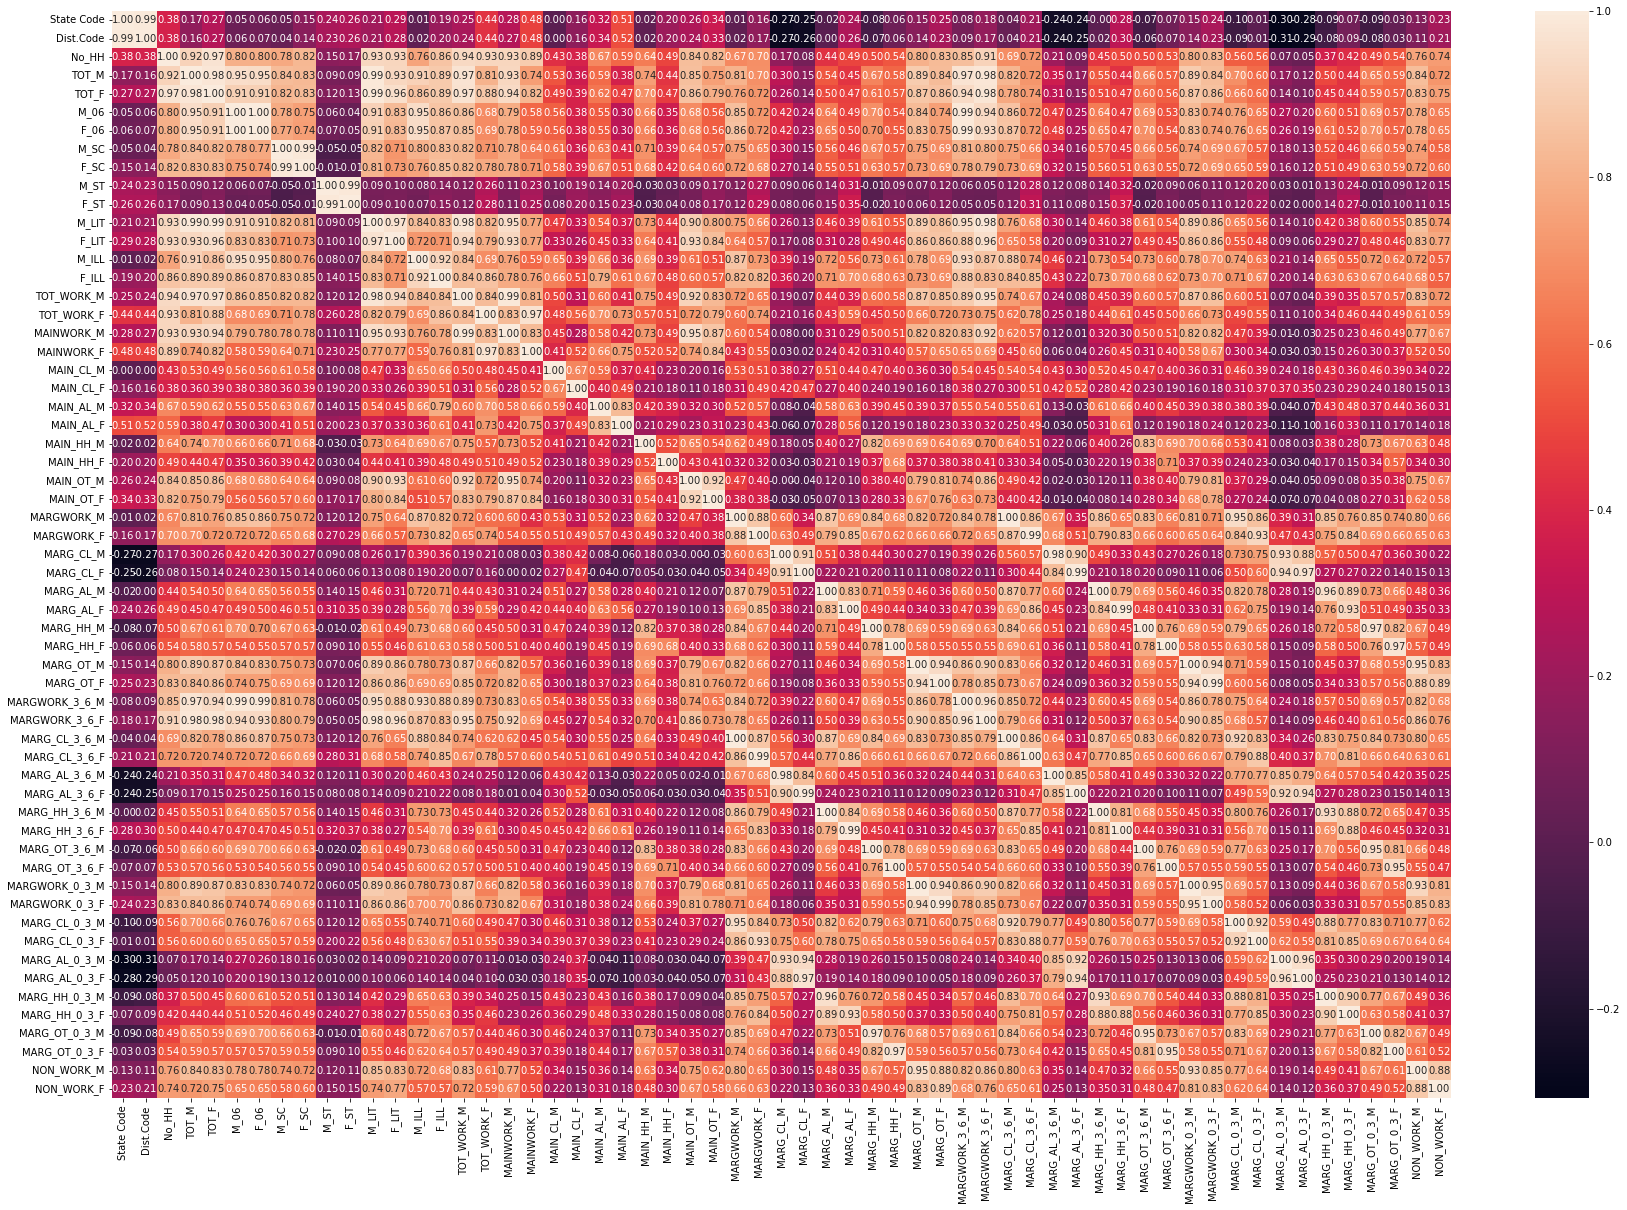

In [15]:
plt.figure(figsize = (30,20))
sns.heatmap(df_num_scaled.corr(), annot=True,fmt='.2f');

In [16]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

C:\Users\Lenovo\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [17]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

C:\Users\Lenovo\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8053442139017948

In [18]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=59)
pca_transformed = pca.fit_transform(df_num_scaled)

In [19]:
#Extract eigen vectors
pca.components_

array([[ 3.00700521e-02,  3.00751392e-02,  1.56432451e-01, ...,
         1.31868671e-01,  1.50219557e-01,  1.31179136e-01],
       [-1.62782525e-01, -1.58821825e-01, -1.28322211e-01, ...,
         5.40694563e-02, -5.44095594e-02, -6.94741471e-02],
       [-2.50129023e-01, -2.59359844e-01, -3.34978669e-02, ...,
        -1.83333910e-03,  1.28955424e-01,  8.67015734e-02],
       ...,
       [ 0.00000000e+00,  1.71303943e-17, -1.32697480e-15, ...,
         2.50846440e-02, -9.07111708e-02,  1.27677660e-02],
       [ 0.00000000e+00, -7.11236625e-17, -2.87360515e-16, ...,
         1.51696221e-03, -4.50040407e-02,  2.57762247e-02],
       [ 0.00000000e+00,  1.16551734e-17, -2.41559822e-15, ...,
        -4.84658783e-02,  5.33733512e-02,  4.36640439e-02]])

In [20]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.18674263e+01, 8.18907061e+00, 4.54275124e+00, 3.84336785e+00,
       2.27105793e+00, 1.95992589e+00, 1.37548006e+00, 8.87342674e-01,
       7.19897963e-01, 6.14059555e-01, 4.94399686e-01, 4.24147991e-01,
       3.43932360e-01, 2.96118628e-01, 2.75961760e-01, 1.84995268e-01,
       1.28846861e-01, 1.11536962e-01, 1.03594789e-01, 9.73429345e-02,
       7.82132546e-02, 5.59614544e-02, 4.44214277e-02, 3.78654873e-02,
       2.96705436e-02, 2.70572400e-02, 2.34417688e-02, 1.43611558e-02,
       1.10964929e-02, 9.28775833e-03, 8.27176626e-03, 7.61344489e-03,
       5.02300148e-03, 4.49943614e-03, 2.51573519e-03, 1.06257176e-03,
       7.11882677e-04, 6.28474170e-30, 6.46518301e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
      

In [21]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.39281923e-01, 1.38580935e-01, 7.68754779e-02, 6.50400438e-02,
       3.84323628e-02, 3.31671780e-02, 2.32767944e-02, 1.50162068e-02,
       1.21825953e-02, 1.03915269e-02, 8.36656248e-03, 7.17771626e-03,
       5.82025365e-03, 5.01111768e-03, 4.67000966e-03, 3.13061378e-03,
       2.18043284e-03, 1.88750315e-03, 1.75310038e-03, 1.64730231e-03,
       1.32357706e-03, 9.47017197e-04, 7.51729139e-04, 6.40785128e-04,
       5.02104803e-04, 4.57880730e-04, 3.96697306e-04, 2.43029093e-04,
       1.87782283e-04, 1.57173665e-04, 1.39980367e-04, 1.28839812e-04,
       8.50025939e-05, 7.61424707e-05, 4.25729552e-05, 1.79815507e-05,
       1.20469553e-05, 1.06354607e-31, 1.09408155e-32, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
       2.78264111e-33, 2.78264111e-33, 2.78264111e-33, 2.78264111e-33,
      

2.6 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

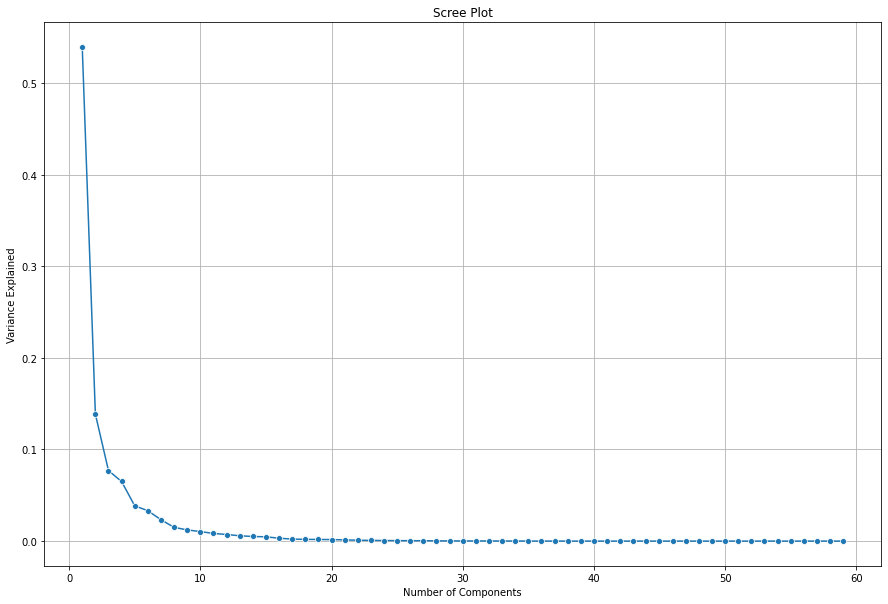

In [22]:
#Create a scree plot
plt.figure(figsize=(15,10))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,60),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [23]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.53928192, 0.67786286, 0.75473834, 0.81977838, 0.85821074,
       0.89137792, 0.91465472, 0.92967092, 0.94185352, 0.95224504,
       0.96061161, 0.96778932, 0.97360958, 0.97862069, 0.9832907 ,
       0.98642132, 0.98860175, 0.99048925, 0.99224235, 0.99388966,
       0.99521323, 0.99616025, 0.99691198, 0.99755277, 0.99805487,
       0.99851275, 0.99890945, 0.99915248, 0.99934026, 0.99949743,
       0.99963741, 0.99976625, 0.99985126, 0.9999274 , 0.99996997,
       0.99998795, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [24]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                                               'PC19','PC20', 'PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                               'PC31','PC32', 'PC33', 'PC34', 'PC35', 'PC36','PC37','PC38', 'PC39', 'PC40', 'PC41', 'PC42',
                                               'PC43','PC44', 'PC45', 'PC46', 'PC47', 'PC48','PC49','PC50', 'PC51','PC52', 'PC53', 'PC54',
                                               'PC55','PC56', 'PC57', 'PC58', 'PC59'],
                                    index = df_num_scaled.columns)

In [25]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753,0.090244,-0.352205,-0.386295,0.181864,0.037733,...,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167,0.079450,-0.351971,-0.392440,0.203407,0.065440,...,2.806999e-16,-3.662977e-16,6.239584e-17,7.619231e-17,-2.862294e-16,-3.070461e-16,-1.131907e-16,1.713039e-17,-7.112366e-17,1.165517e-17
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504,-0.000996,-0.054283,0.116661,0.020510,0.000216,...,-2.725465e-17,-2.978481e-15,-5.406291e-16,-1.210411e-16,-9.154830e-16,-8.800618e-16,-1.444326e-15,-1.326975e-15,-2.873605e-16,-2.415598e-15
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227,-0.074100,0.069576,-0.007883,0.117189,0.030459,...,-3.182250e-02,-1.366032e-01,-1.001704e-03,-1.379260e-01,-2.873549e-01,-2.253073e-01,-2.139367e-01,3.308894e-02,6.203340e-03,-3.789174e-03
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928,-0.046350,0.008746,0.033156,0.086647,0.025439,...,-5.460471e-02,-3.281547e-01,1.326763e-02,-3.049109e-01,-1.751769e-01,-1.198409e-01,-2.041267e-01,1.526742e-01,-1.745794e-01,-1.672519e-02
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415,-0.152284,0.088987,-0.088322,0.230863,-0.018073,...,-2.088173e-16,2.659331e-15,2.883653e-15,5.330805e-15,-2.427637e-15,1.571822e-15,1.483189e-15,-1.908196e-15,2.203099e-15,-2.424276e-16
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113,-0.149228,0.088532,-0.100682,0.239290,-0.016980,...,-5.024117e-16,-3.442755e-15,-3.626342e-15,-5.317713e-15,1.806398e-15,-3.827846e-16,-2.291277e-15,2.307459e-15,-2.521953e-15,-1.223753e-15
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394,-0.045912,0.015994,0.079119,-0.239926,-0.037393,...,-1.374335e-15,-1.805847e-15,-9.327628e-16,-1.590741e-15,-1.099815e-15,-1.679212e-15,-3.816392e-16,-1.417703e-15,-1.413800e-15,-1.651782e-15
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823,-0.022720,-0.043008,0.113026,-0.259835,-0.033859,...,1.369564e-15,1.417269e-15,1.050389e-15,1.321859e-15,1.096345e-15,1.772887e-15,3.469447e-18,1.937252e-15,1.142695e-15,1.652107e-15
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538,0.110757,0.504502,-0.061719,0.001861,0.001838,...,4.267420e-16,1.110223e-16,-7.268491e-16,-3.191891e-16,2.081668e-16,-2.775558e-16,-2.914335e-16,-1.457168e-15,2.012279e-16,3.564857e-16


As 6 PCA components are explaining atleast 90% explained variance thus 6 PCs are the optimum number of PCs.

In [26]:
#Choose the PCs basis cumulative explained variance(atleast 90%)
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6']]

In [27]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
State Code,0.030070,-0.162783,-0.250129,0.120049,0.145753,0.090244
Dist.Code,0.030075,-0.158822,-0.259360,0.110852,0.136167,0.079450
No_HH,0.156432,-0.128322,-0.033498,0.101335,-0.022504,-0.000996
TOT_M,0.167038,-0.080861,0.063630,0.033299,-0.049227,-0.074100
TOT_F,0.165702,-0.101111,0.024403,0.071948,-0.027928,-0.046350
M_06,0.161871,-0.012753,0.070453,0.007703,-0.069415,-0.152284
F_06,0.162266,-0.011674,0.063515,0.002417,-0.062113,-0.149228
M_SC,0.151068,-0.035627,0.035345,-0.024603,-0.185394,-0.045912
F_SC,0.151483,-0.047732,-0.009677,0.002284,-0.170823,-0.022720
M_ST,0.027664,0.008893,-0.201756,0.142128,0.372538,0.110757


2.7 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

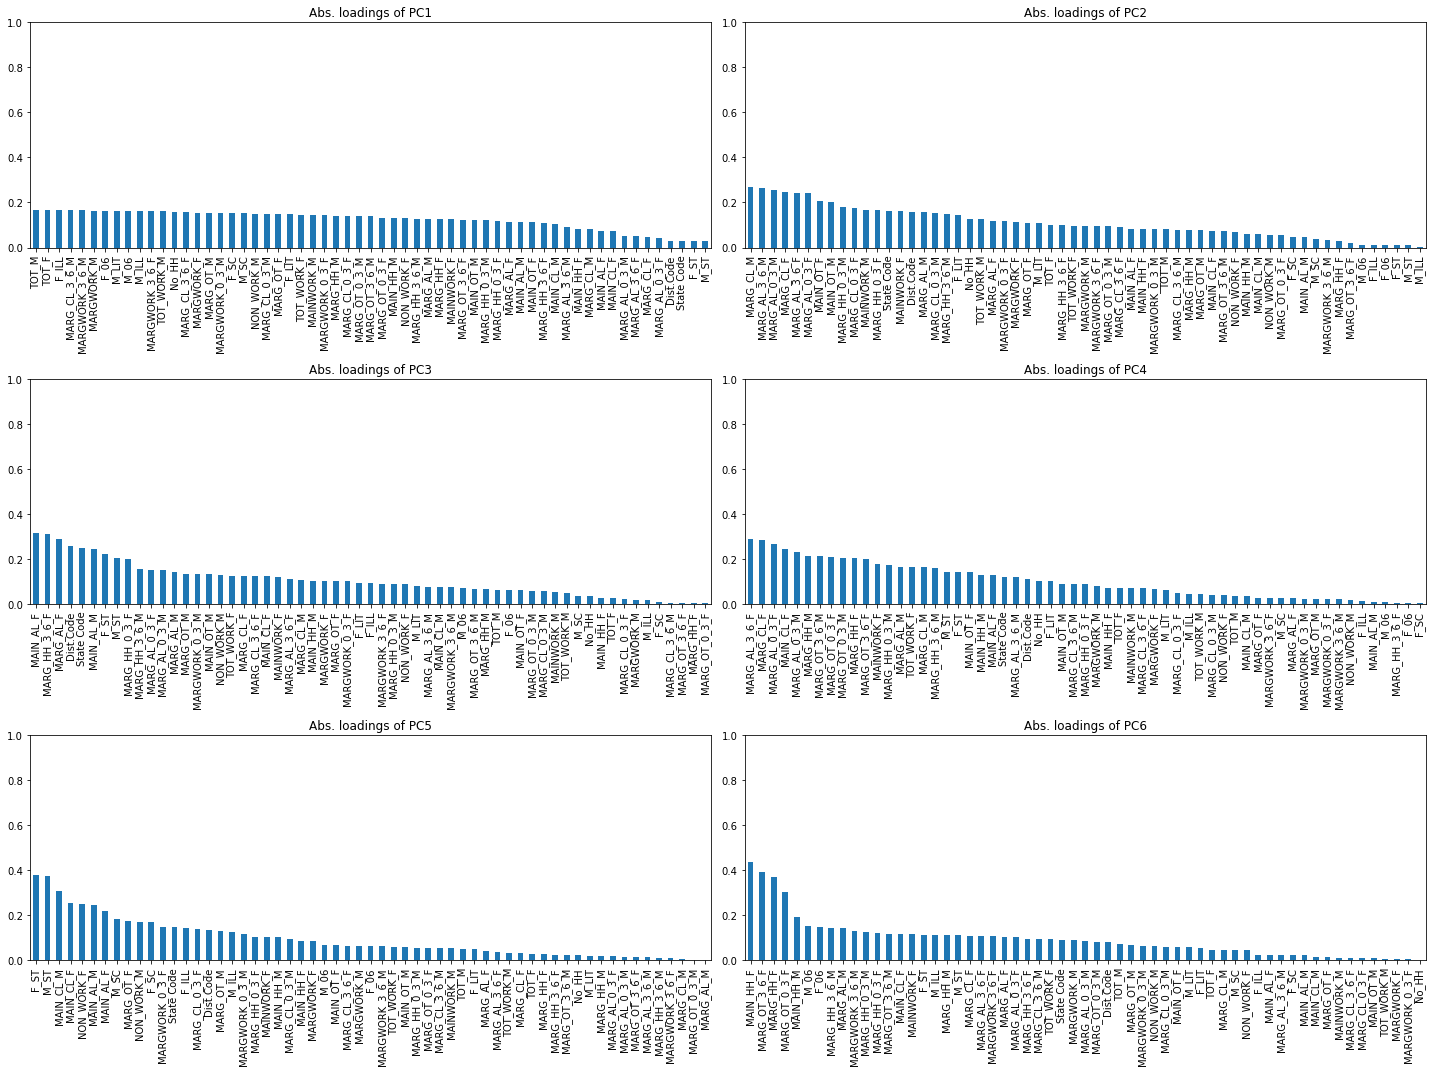

In [46]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,15))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

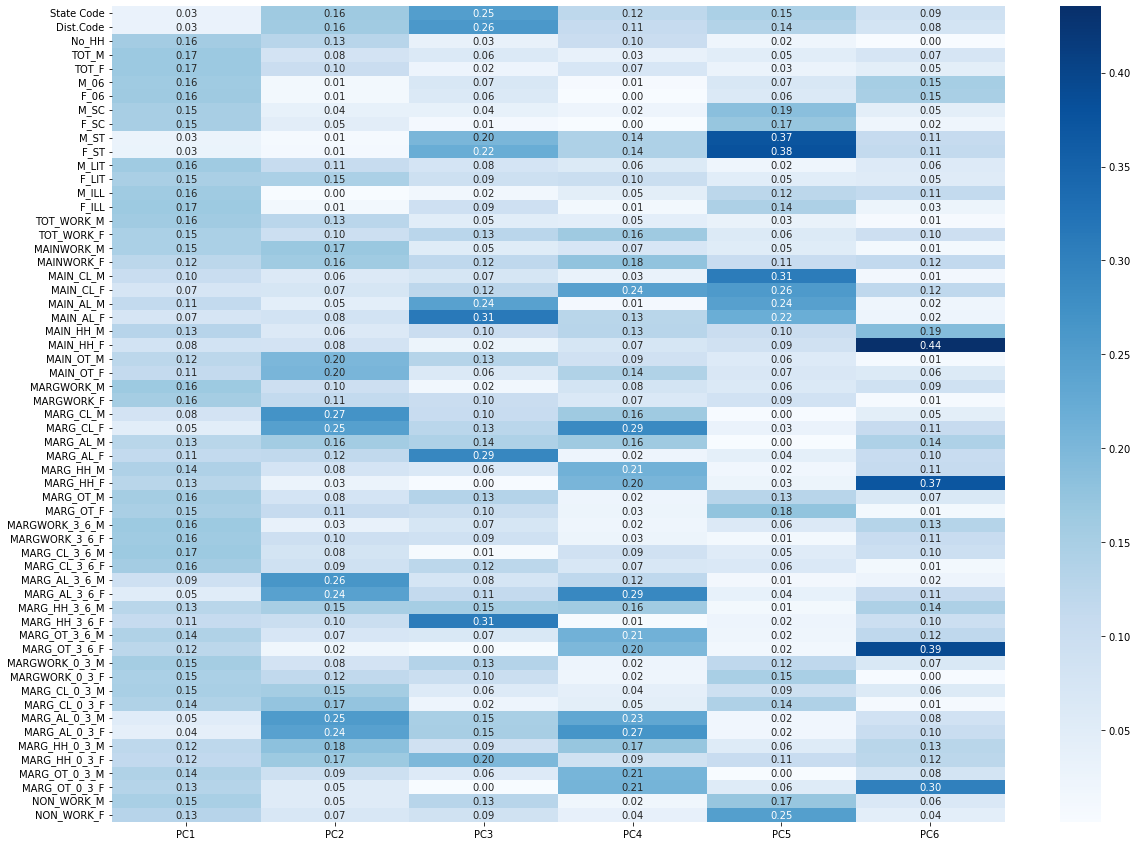

In [47]:
#Compare how the original features influence various PCs
plt.figure(figsize = (20,15))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [33]:
from matplotlib.patches import Rectangle

In [34]:
pca = PCA(n_components=6)
pca_transformed = pca.fit_transform(df_num_scaled)

In [35]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))

In [36]:
df_pca_loading

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.030070,0.030075,0.156432,0.167038,0.165702,0.161871,0.162266,0.151068,0.151483,0.027664,...,0.149445,0.139705,0.051646,0.040969,0.121254,0.115790,0.139260,0.131869,0.150220,0.131179
1,-0.162783,-0.158822,-0.128322,-0.080861,-0.101111,-0.012753,-0.011674,-0.035627,-0.047732,0.008893,...,0.154508,0.174434,0.253834,0.242224,0.181278,0.165403,0.093446,0.054069,-0.054410,-0.069474
2,-0.250129,-0.259360,-0.033498,0.063630,0.024403,0.070453,0.063515,0.035345,-0.009677,-0.201756,...,0.057198,-0.023800,0.149589,0.151083,-0.088656,-0.197795,0.058031,-0.001833,0.128955,0.086702
3,0.120049,0.110852,0.101335,0.033299,0.071948,0.007703,0.002417,-0.024603,0.002284,0.142128,...,-0.040609,0.046423,0.230440,0.265749,-0.171925,-0.086789,-0.205374,-0.207761,-0.019155,0.037790
4,0.145753,0.136167,-0.022504,-0.049227,-0.027928,-0.069415,-0.062113,-0.185394,-0.170822,0.372538,...,0.093749,0.140430,-0.016334,-0.017104,0.055508,0.105537,0.002041,0.055448,0.171164,0.248574
5,0.090244,0.079450,-0.000996,-0.074100,-0.046350,-0.152284,-0.149228,-0.045912,-0.022720,0.110757,...,-0.059995,-0.009186,0.084514,0.104128,-0.126943,-0.123162,0.079751,0.301496,-0.064672,-0.044080


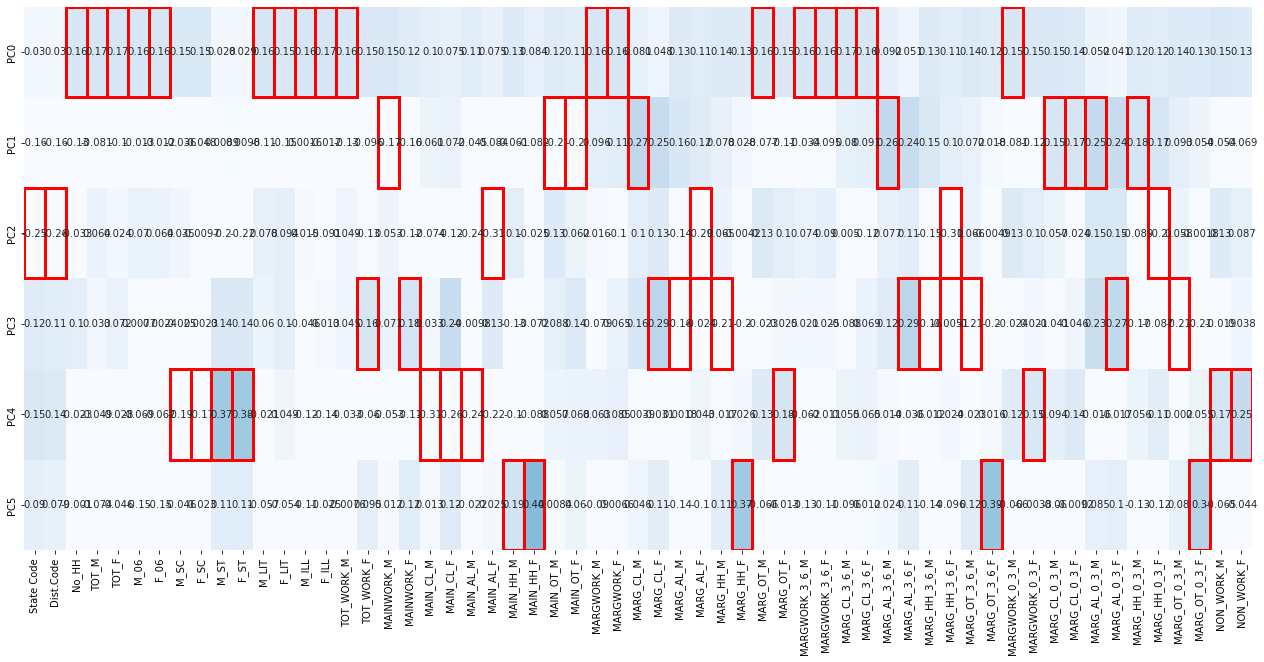

In [60]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [61]:
df_num_scaled.iloc[0]

State Code       -1.710782
Dist.Code        -1.729347
No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
M

In [37]:
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_num_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.719381 0.717504 1.632266 -1.524984 0.090256 -0.612573 

In [38]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_num_scaled)

In [39]:
names=df['State']

In [41]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
prop_var = np.round(pca.explained_variance_ratio_,2)
std_dev = np.round(np.sqrt(pca.explained_variance_),2)
cum_var = np.round(np.cumsum(pca.explained_variance_ratio_),2)
temp = pd.DataFrame(pc_comps,columns=['PCs'])
temp['Proportion Of Variance'] = prop_var
temp['Standard Deviation'] = std_dev
temp['Cumulative Proportion'] = cum_var
temp

,PCs,Proportion Of Variance,Standard Deviation,Cumulative Proportion
0,PC1,0.54,5.65,0.54
1,PC2,0.14,2.86,0.68
2,PC3,0.08,2.13,0.75
3,PC4,0.07,1.96,0.82
4,PC5,0.04,1.51,0.86
5,PC6,0.03,1.40,0.89


In [66]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.719381,0.717504,1.632266,-1.524985,0.090263,-0.612570
1,-4.873297,0.492001,1.752127,-1.938533,-0.262972,0.305220
2,-6.062948,0.233751,1.333068,-0.710273,0.152175,-0.016516
3,-6.378387,0.042766,1.404373,-1.187673,0.013930,-0.177341
4,-4.581259,1.431602,1.722496,-0.231724,0.579570,0.058363
...,...,...,...,...,...,...
635,-6.150873,-1.405780,-0.232601,-0.486828,0.748183,0.245559
636,-5.656448,-1.453038,-0.310560,-0.465030,0.723281,0.242878
637,-6.180341,-1.216266,-0.346109,-0.684360,0.907048,0.548391
638,-6.108741,-1.248980,-0.279498,-0.421099,0.776495,0.305534


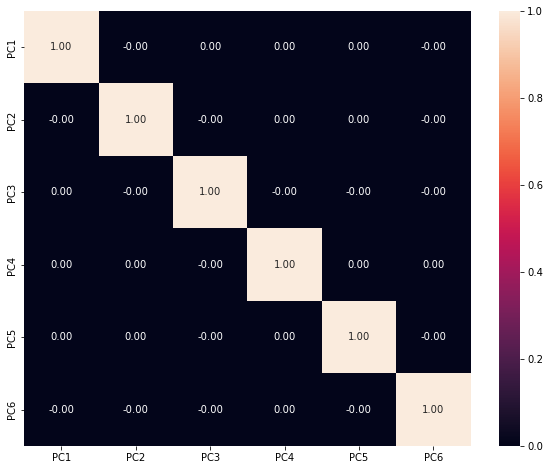

In [65]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

2.8 - PCA: Write linear equation for first PC.

Linear equation for PC1 = a1x1 + a2x2 + a3x3 + ............+ anXn , where a1,a2....aN are the coefficients or loadings and x1,x2,x3.....xn are the observed data .

In [67]:
df_pca_loading

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.030070,0.030075,0.156432,0.167038,0.165702,0.161871,0.162266,0.151068,0.151483,0.027664,...,0.149445,0.139705,0.051646,0.040969,0.121254,0.115790,0.139260,0.131869,0.150220,0.131179
1,-0.162783,-0.158822,-0.128322,-0.080861,-0.101111,-0.012753,-0.011674,-0.035627,-0.047732,0.008893,...,0.154508,0.174434,0.253834,0.242224,0.181278,0.165403,0.093446,0.054069,-0.054410,-0.069474
2,-0.250129,-0.259360,-0.033498,0.063630,0.024403,0.070453,0.063515,0.035345,-0.009677,-0.201756,...,0.057198,-0.023800,0.149589,0.151083,-0.088656,-0.197795,0.058031,-0.001833,0.128955,0.086702
3,0.120049,0.110852,0.101335,0.033299,0.071948,0.007703,0.002417,-0.024603,0.002284,0.142128,...,-0.040609,0.046423,0.230440,0.265749,-0.171925,-0.086789,-0.205374,-0.207761,-0.019155,0.037790
4,0.145753,0.136167,-0.022504,-0.049227,-0.027928,-0.069415,-0.062113,-0.185395,-0.170823,0.372538,...,0.093749,0.140430,-0.016334,-0.017104,0.055508,0.105537,0.002041,0.055448,0.171164,0.248574
5,0.090244,0.079450,-0.000996,-0.074100,-0.046350,-0.152284,-0.149228,-0.045912,-0.022720,0.110757,...,-0.059995,-0.009186,0.084513,0.104128,-0.126943,-0.123162,0.079751,0.301497,-0.064671,-0.044081


Linear equation for PC1 = (0.03070)X1 + (0.030075)X2 + (0.156432)X3 + ......
where X1 is state code, X2 is dist.Code etc.